In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy.stats import skew,kurtosis,zscore
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, levene, ttest_ind, f_oneway, mannwhitneyu, kruskal, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE

In [3]:
df_csv = pd.read_csv("diabetes.csv")
df_csv

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
print("Creando la columna cualitativa 'Grupo_Edad'...")

# Definimos los límites (bins) para los grupos de edad:
bins = [0, 30, 50, np.inf]

# Definimos las etiquetas (nombres) para esos grupos
labels = ['Joven (0-30)', 'Adulto (31-50)', 'Mayor (51+)']

# Usamos la función pd.cut() para crear la nueva columna
# Asegúrate de que tu archivo tenga una columna llamada 'Age'
df_csv['Grupo_Edad'] = pd.cut(df_csv['Age'], bins=bins, labels=labels, right=True)

print("--- DataFrame Modificado (con la nueva columna 'Grupo_Edad') ---")
print(df_csv.head())

# Verificamos los tipos de datos (dtypes) para confirmar
print("\n--- Tipos de Datos (Dtypes) ---")
print(df_csv.dtypes)

Creando la columna cualitativa 'Grupo_Edad'...
--- DataFrame Modificado (con la nueva columna 'Grupo_Edad') ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome      Grupo_Edad  
0                     0.627   50        1  Adulto (31-50)  
1                     0.351   31        0  Adulto (31-50)  
2                     0.672   32        1  Adulto (31-50)  
3                     0.167   21        0    Joven (0-30)  
4                     2.288   33        1  Adulto (31-50)  

--- Tipos de Datos (Dtypes) ---
Pregnancies                    int64
Glucose                  

In [5]:
df_csv


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome      Grupo_Edad  
0                       0.627   50        1  Adulto (31-50)  
1                       0.351   31        0  Adulto (31-50)  
2                       0.672   32        1  Adulto (31-50)  
3                       0.167   21        0    Joven (0-30)  
4                       2.288   33        1  Adulto (31-50)  
..                        ...  ...      ...             ...  
763                     0.171   63        0     Mayor (51+)  
764                     0.340   27        0    Joven (0-30)  
765                     0.245   30        0    Joven (0-30)  
766                     0.349   47        1  Adulto (31-50)  
767                     0.315   23        0    Joven (0-30)  

[768 rows x 10 columns]

In [6]:

# --- 1. Seleccionar SOLO las variables cuantitativas (X) ---
# Excluimos la variable objetivo 'Outcome' y la cualitativa 'Grupo_Edad'
quantitative_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creamos un nuevo DataFrame solo con estas columnas
df_quant = df_csv[quantitative_vars]

print(f"Analizando {len(quantitative_vars)} variables cuantitativas...")

# --- 2. Realizar los cálculos del inciso 3 ---

# Usamos describe() para obtener la mayoría de las estadísticas
# .T transpone la tabla para que las variables queden como filas
desc = df_quant.describe().T

# Añadimos las columnas que faltan:

# Coeficiente de variación (CV = std / mean)
desc['coef_var'] = desc['std'] / desc['mean']

# Asimetría (skewness) - aplicado solo al DataFrame cuantitativo
desc['skewness'] = df_quant.apply(skew)

# Curtosis (kurtosis) - aplicado solo al DataFrame cuantitativo
desc['kurtosis'] = df_quant.apply(kurtosis)

# Reordenamos las columnas para que coincidan con la imagen (opcional pero prolijo)
column_order = ['mean', 'std', 'coef_var', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
desc = desc[column_order]

# Renombramos percentiles para mayor claridad
desc = desc.rename(columns={
    '25%': 'Q1 (25%)',
    '50%': 'Q2 (median)',
    '75%': 'Q3 (75%)'
})

# --- 3. Mostrar la tabla final ---
print("\n--- Tabla de Análisis Descriptivo (Variables Cuantitativas) ---")
display(desc)

Analizando 8 variables cuantitativas...

--- Tabla de Análisis Descriptivo (Variables Cuantitativas) ---


mean         std  coef_var     min  Q1 (25%)  \
Pregnancies                 3.845052    3.369578  0.876341   0.000   1.00000   
Glucose                   120.894531   31.972618  0.264467   0.000  99.00000   
BloodPressure              69.105469   19.355807  0.280091   0.000  62.00000   
SkinThickness              20.536458   15.952218  0.776775   0.000   0.00000   
Insulin                    79.799479  115.244002  1.444170   0.000   0.00000   
BMI                        31.992578    7.884160  0.246437   0.000  27.30000   
DiabetesPedigreeFunction    0.471876    0.331329  0.702151   0.078   0.24375   
Age                        33.240885   11.760232  0.353788  21.000  24.00000   

                          Q2 (median)   Q3 (75%)     max  skewness  kurtosis  
Pregnancies                    3.0000    6.00000   17.00  0.899912  0.150383  
Glucose                      117.0000  140.25000  199.00  0.173414  0.628813  
BloodPressure                 72.0000   80.00000  122.00 -1.840005  5.138691  
SkinThickness                 23.0000   32.00000   99.00  0.109159 -0.524494  
Insulin                       30.5000  127.25000  846.00  2.267810  7.159575  
BMI                           32.0000   36.60000   67.10 -0.428143  3.261257  
DiabetesPedigreeFunction       0.3725    0.62625    2.42  1.916159  5.550792  
Age                           29.0000   41.00000   81.00  1.127389  0.631177

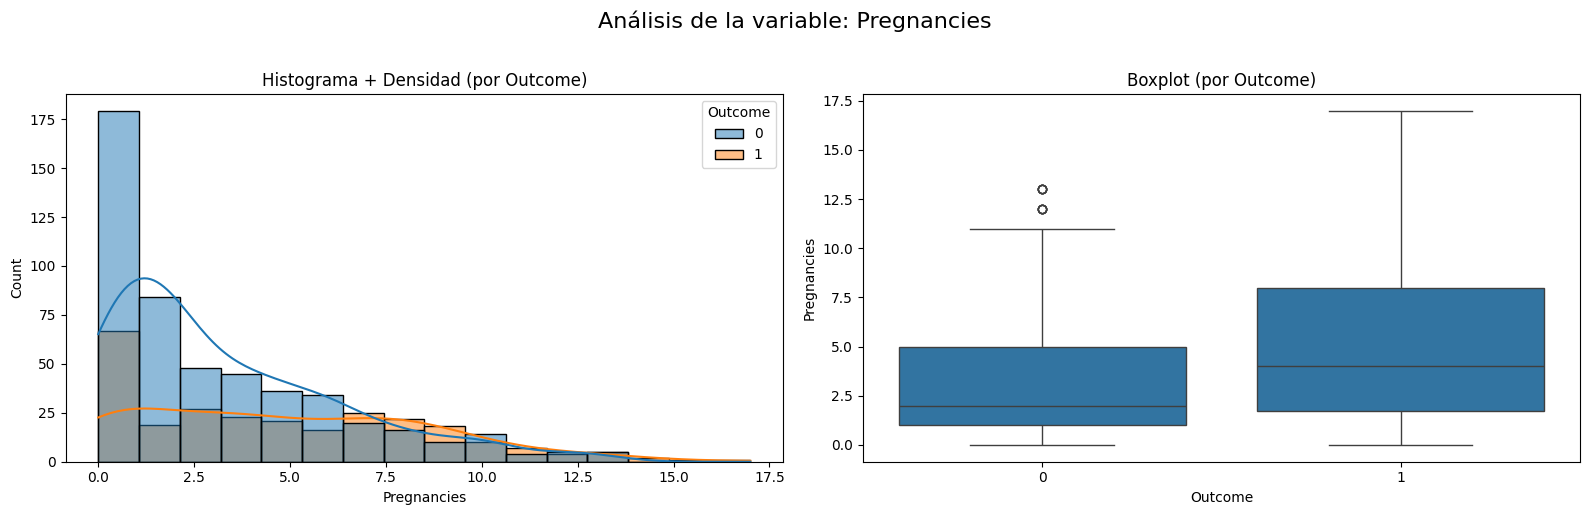

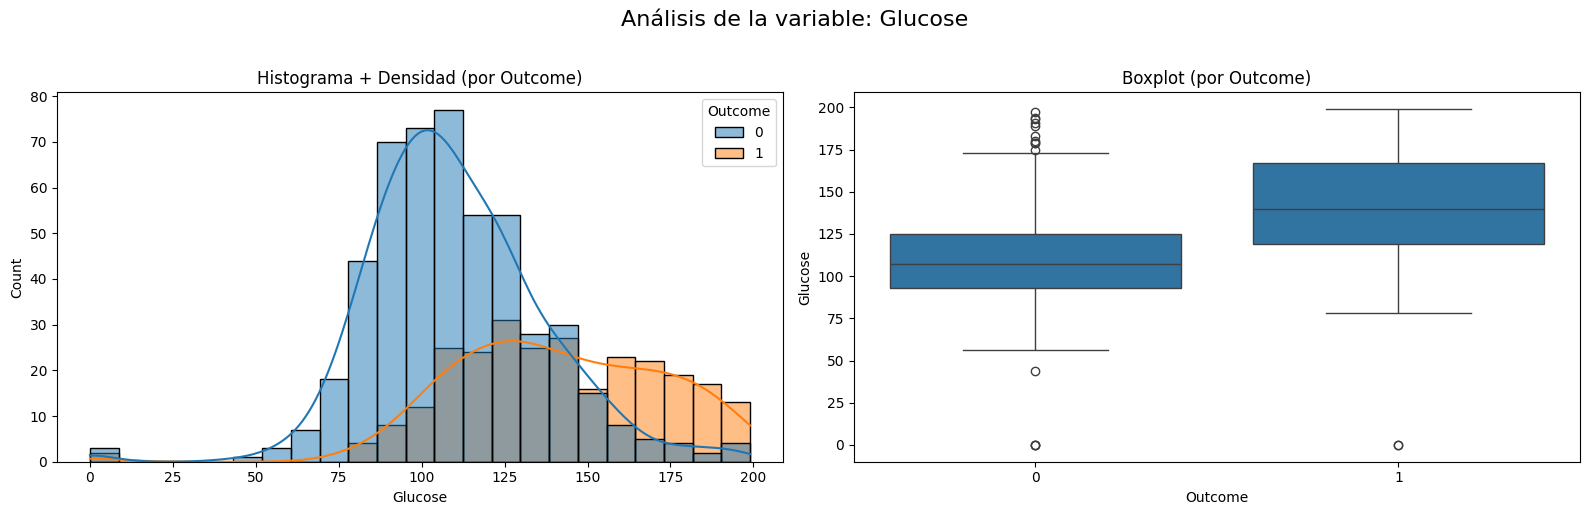

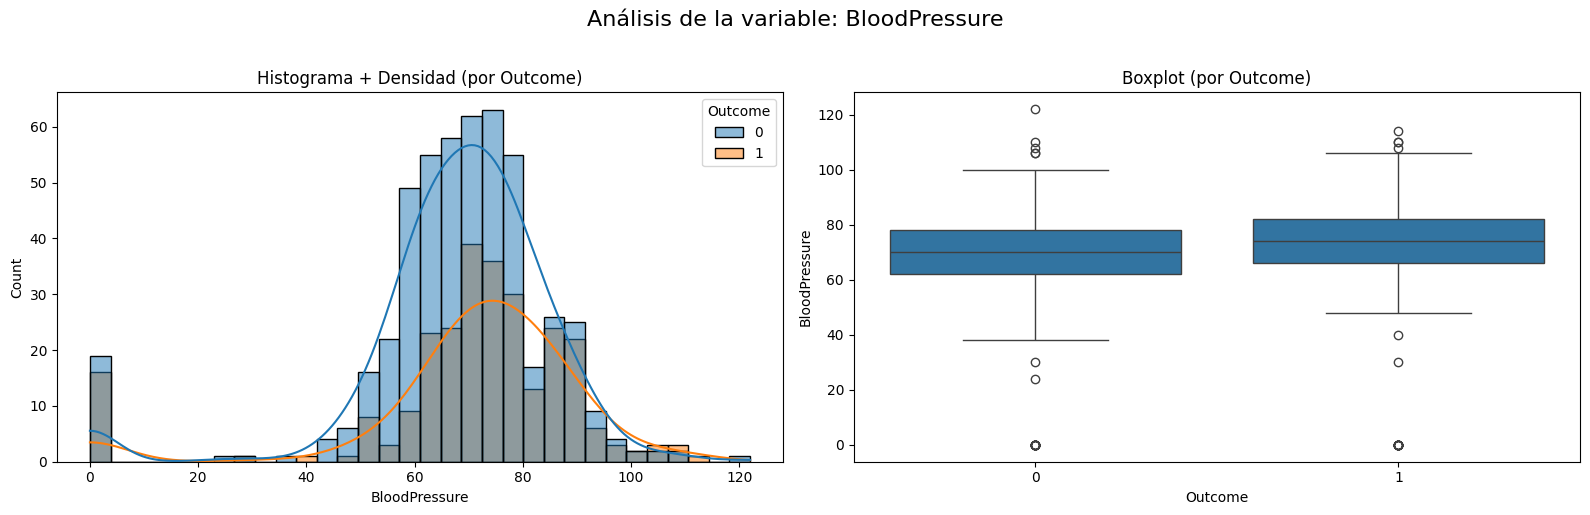

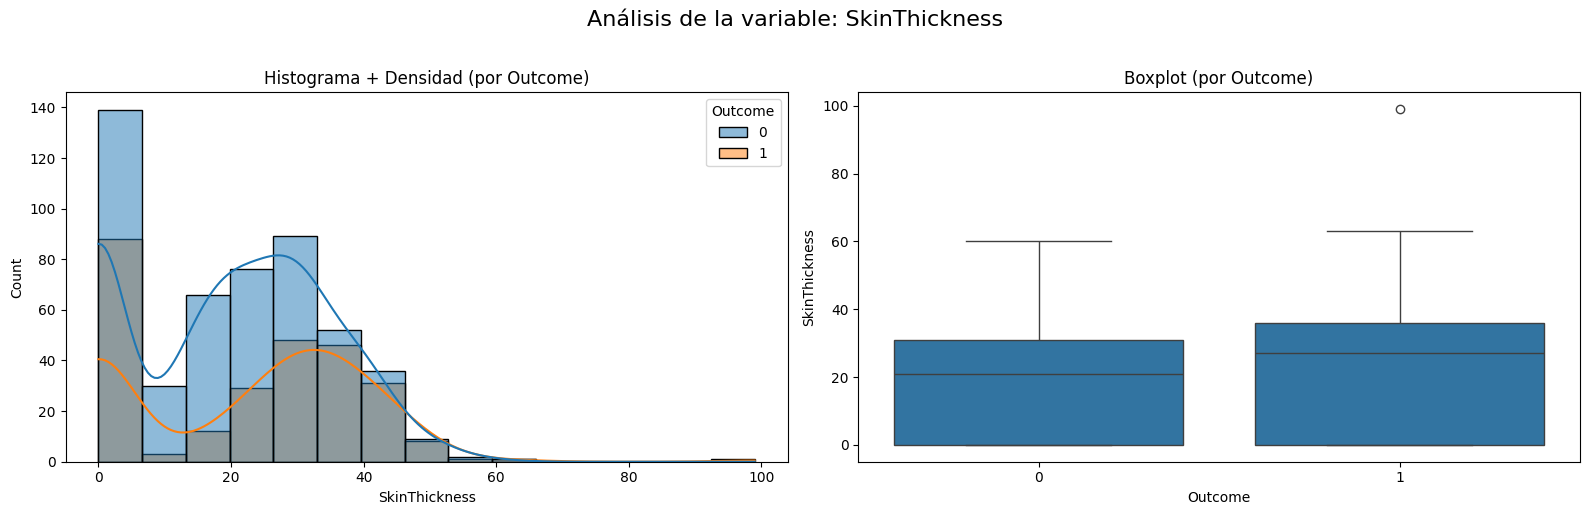

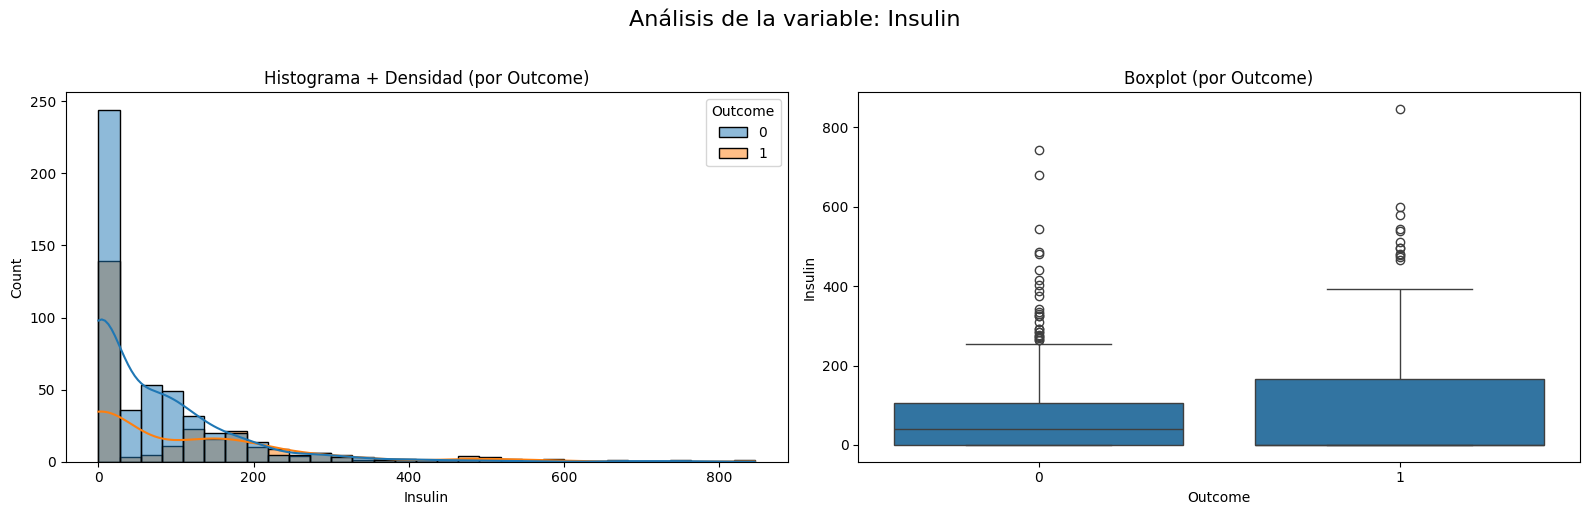

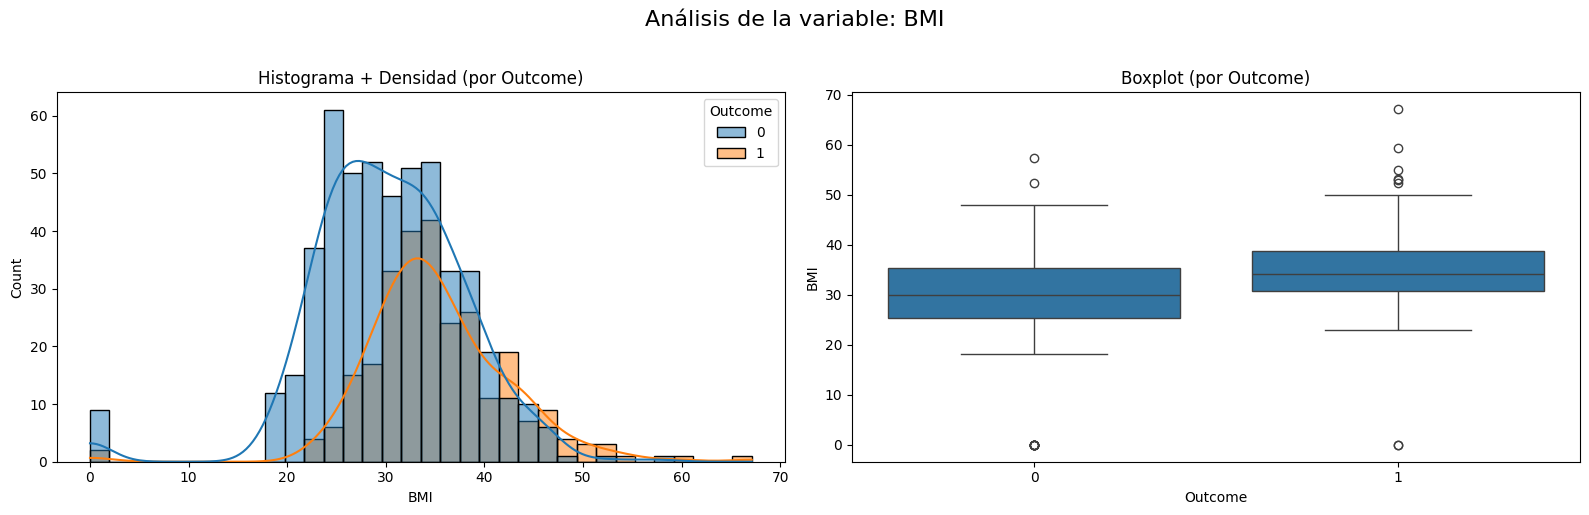

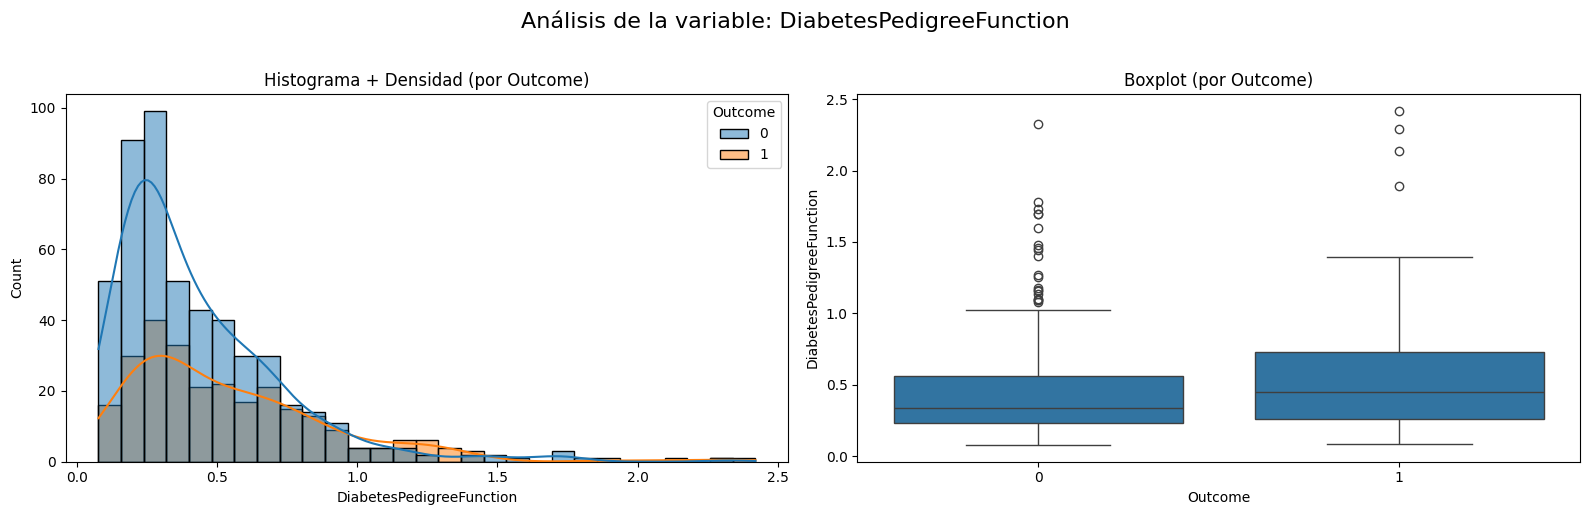

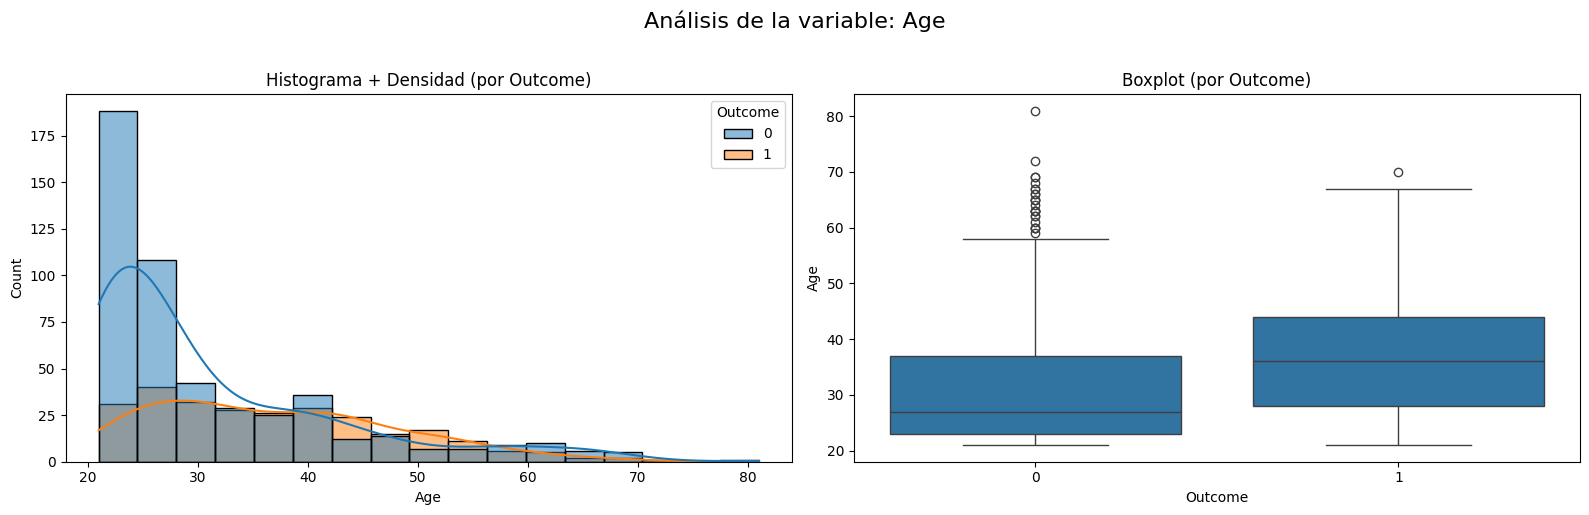

In [7]:
for var in df_quant.columns:
    
    # Creamos una figura con 2 sub-gráficos (uno al lado del otro)
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    fig.suptitle(f'Análisis de la variable: {var}', fontsize=16, y=1.02)
    
    # Gráfico 1: Histograma y Densidad (agrupado por 'Outcome')
    # Usamos 'data=df' (el DataFrame COMPLETO) para poder usar 'Outcome' en 'hue'
    sns.histplot(data=df_csv, x=var, hue='Outcome', kde=True, ax=axes[0])
    axes[0].set_title('Histograma + Densidad (por Outcome)')
    
    # Gráfico 2: Boxplot (agrupado por 'Outcome')
    sns.boxplot(data=df_csv, x='Outcome', y=var, ax=axes[1])
    axes[1].set_title('Boxplot (por Outcome)')
    
    plt.tight_layout()
    plt.show()

In [8]:
def detectar_outliers(df, var, eps=0.5, min_samples=5, mostrar_grafico=True):
    """
    Detecta outliers en una variable numérica de un DataFrame usando:
    - Método IQR
    - Método Z-score
    - DBSCAN
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos
    var : str
        Nombre de la variable (columna) a analizar
    eps : float
        Parámetro epsilon para DBSCAN
    min_samples : int
        Número mínimo de muestras para DBSCAN
    mostrar_grafico : bool
        Si True, muestra el gráfico resumen de los outliers

    Retorna:
    --------
    dict con resultados estadísticos y booleanos de detección de outliers
    """

    subset = df[var].dropna().values  # eliminar posibles NaN

    # --- Paleta de colores ---
    palette = {
        "normal": "#1f77b4",       # azul
        "iqr": "#ff7f0e",          # naranja
        "zscore": "#2ca02c",       # verde
        "dbscan": "#d62728",       # rojo
        "compartidos": "#9467bd"   # morado
    }

    # --- Cálculo de outliers ---
    Q1, Q3 = np.percentile(subset, [25, 75])
    IQR = Q3 - Q1
    lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    out_iqr = (subset < lim_inf) | (subset > lim_sup)

    out_z = np.abs(zscore(subset)) > 3

    db = DBSCAN(eps=eps, min_samples=min_samples)
    out_db = db.fit_predict(subset.reshape(-1, 1)) == -1

    # --- Combinación de métodos ---
    out_total = out_iqr.astype(int) + out_z.astype(int) + out_db.astype(int)
    normales = out_total == 0
    solo_iqr = out_iqr & (out_total == 1)
    solo_z = out_z & (out_total == 1)
    solo_db = out_db & (out_total == 1)
    compartidos = out_total >= 2

    # --- Reporte ---
    print(f"📊 Variable: {var}")
    print(f" - Outliers IQR: {np.sum(out_iqr)} | Límites: {lim_inf:.3f} - {lim_sup:.3f}")
    print(f" - Outliers Z-score: {np.sum(out_z)}")
    print(f" - Outliers DBSCAN: {np.sum(out_db)}")
    print(f" - Compartidos (≥2 métodos): {np.sum(compartidos)}")
    print(f" - Total de datos: {len(subset)}")

    # --- Gráfico ---
    if mostrar_grafico:
        plt.figure(figsize=(12, 6))
        plt.title(f"Detección de outliers - {var}", fontsize=14, fontweight="bold")
        plt.xlabel(var, fontsize=12)
        sns.boxplot(x=subset, color="#f0f0f0")

        jitter = np.random.uniform(-0.05, 0.05, size=len(subset))
        plt.scatter(subset[normales], jitter[normales], color=palette["normal"], s=40, alpha=0.6, label="Normales")
        plt.scatter(subset[solo_iqr], jitter[solo_iqr], color=palette["iqr"], s=60, alpha=0.8, label="IQR")
        plt.scatter(subset[solo_z], jitter[solo_z], color=palette["zscore"], s=60, alpha=0.8, label="Z-score")
        plt.scatter(subset[solo_db], jitter[solo_db], color=palette["dbscan"], s=60, alpha=0.8, label="DBSCAN")
        plt.scatter(subset[compartidos], jitter[compartidos], color=palette["compartidos"], s=80, alpha=0.9, label="Compartidos (≥2)")

        # Líneas de referencia
        plt.axvline(Q1, color="#2A9D8F", linestyle="--", linewidth=1.2)
        plt.axvline(Q3, color="#2A9D8F", linestyle="--", linewidth=1.2)
        plt.axvline(lim_inf, color="#F4A261", linestyle=":", linewidth=1.2)
        plt.axvline(lim_sup, color="#F4A261", linestyle=":", linewidth=1.2)

        plt.yticks([])
        plt.legend(frameon=True)
        plt.tight_layout()
        plt.show()

    # --- Resultados en diccionario ---
    resultados = {
        "variable": var,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lim_inf": lim_inf,
        "lim_sup": lim_sup,
        "outliers_iqr": out_iqr,
        "outliers_zscore": out_z,
        "outliers_dbscan": out_db,
        "compartidos": compartidos,
        "total_outliers": np.sum(out_total > 0)
    }

    return resultados

📊 Variable: Pregnancies
 - Outliers IQR: 4 | Límites: -6.500 - 13.500
 - Outliers Z-score: 4
 - Outliers DBSCAN: 4
 - Compartidos (≥2 métodos): 4
 - Total de datos: 768


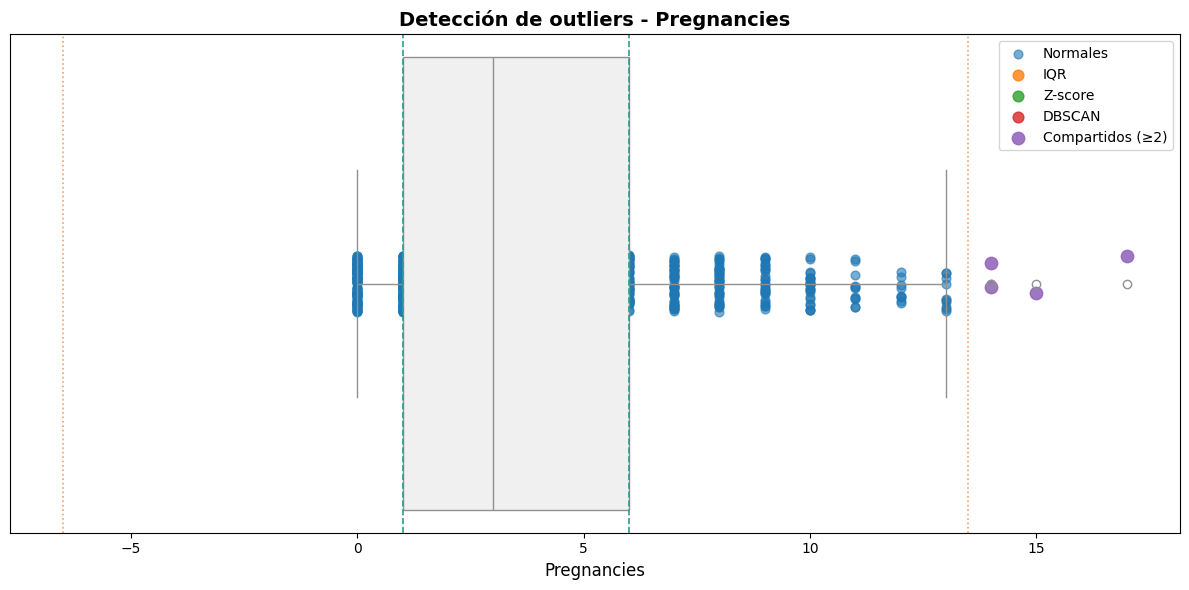

{'variable': 'Pregnancies',
 'Q1': np.float64(1.0),
 'Q3': np.float64(6.0),
 'IQR': np.float64(5.0),
 'lim_inf': np.float64(-6.5),
 'lim_sup': np.float64(13.5),
 'outliers_iqr': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,

In [9]:
detectar_outliers(df_csv, var="Pregnancies")

📊 Variable: Glucose
 - Outliers IQR: 5 | Límites: 37.125 - 202.125
 - Outliers Z-score: 5
 - Outliers DBSCAN: 145
 - Compartidos (≥2 métodos): 5
 - Total de datos: 768


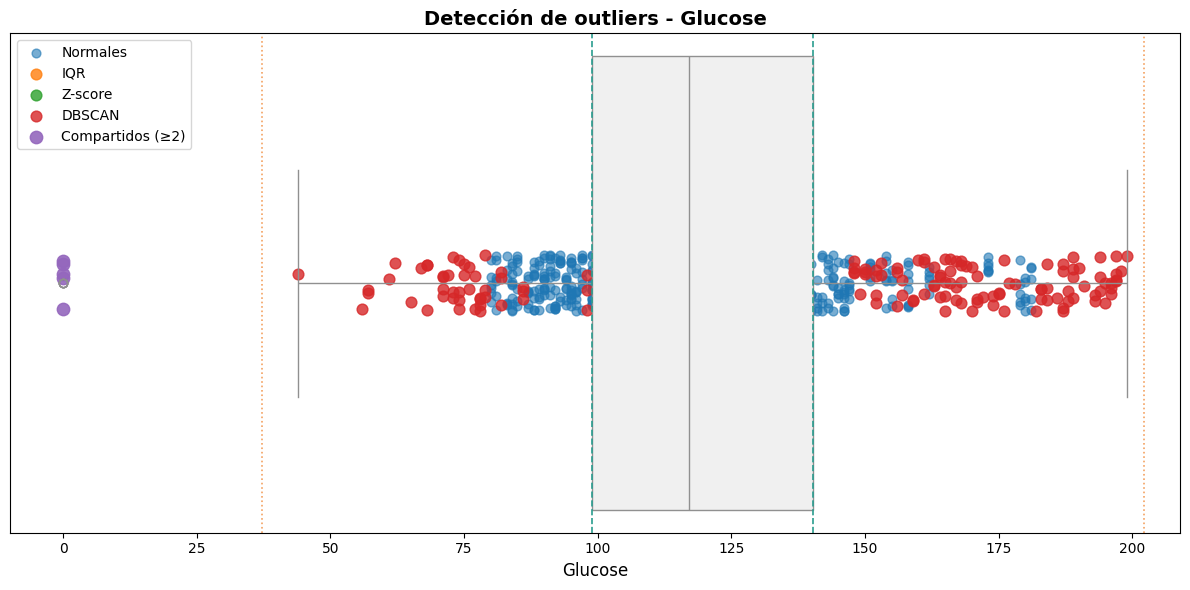

{'variable': 'Glucose',
 'Q1': np.float64(99.0),
 'Q3': np.float64(140.25),
 'IQR': np.float64(41.25),
 'lim_inf': np.float64(37.125),
 'lim_sup': np.float64(202.125),
 'outliers_iqr': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,

In [10]:
detectar_outliers(df_csv, var="Glucose")

📊 Variable: BloodPressure
 - Outliers IQR: 45 | Límites: 35.000 - 107.000
 - Outliers Z-score: 35
 - Outliers DBSCAN: 38
 - Compartidos (≥2 métodos): 45
 - Total de datos: 768


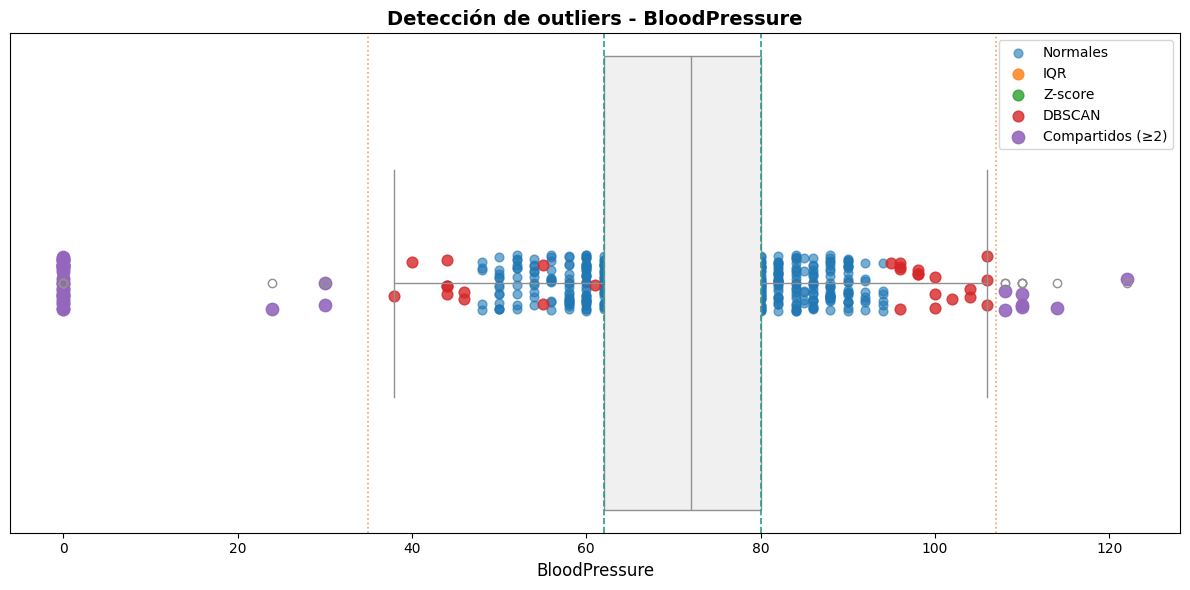

{'variable': 'BloodPressure',
 'Q1': np.float64(62.0),
 'Q3': np.float64(80.0),
 'IQR': np.float64(18.0),
 'lim_inf': np.float64(35.0),
 'lim_sup': np.float64(107.0),
 'outliers_iqr': array([False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, 

In [11]:
detectar_outliers(df_csv, var="BloodPressure")

📊 Variable: SkinThickness
 - Outliers IQR: 1 | Límites: -48.000 - 80.000
 - Outliers Z-score: 1
 - Outliers DBSCAN: 27
 - Compartidos (≥2 métodos): 1
 - Total de datos: 768


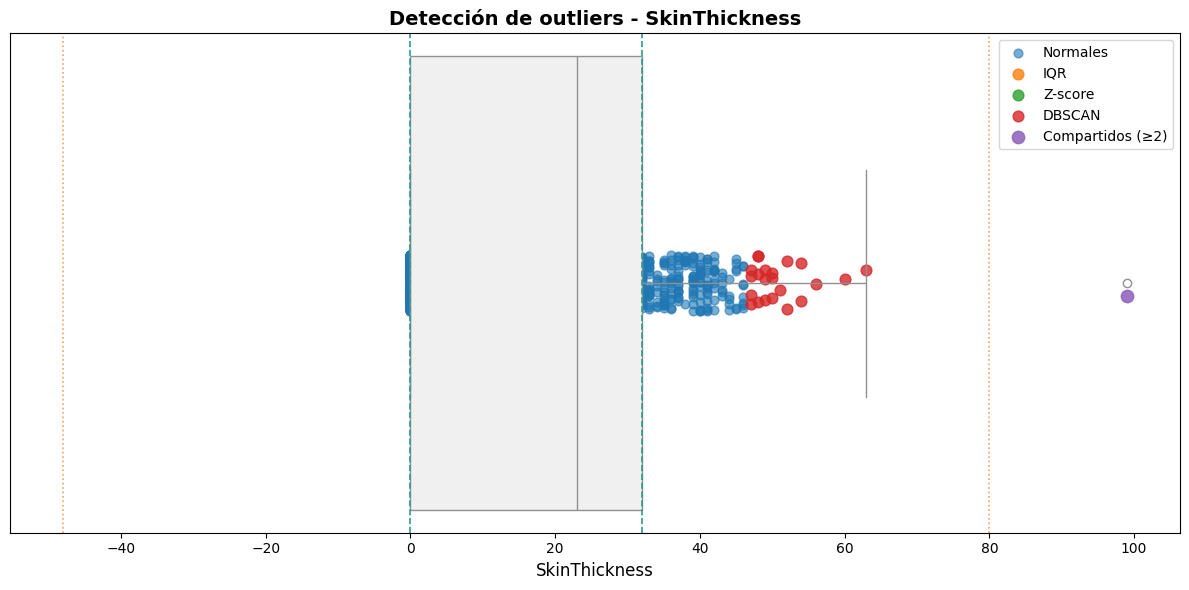

{'variable': 'SkinThickness',
 'Q1': np.float64(0.0),
 'Q3': np.float64(32.0),
 'IQR': np.float64(32.0),
 'lim_inf': np.float64(-48.0),
 'lim_sup': np.float64(80.0),
 'outliers_iqr': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, F

In [12]:
detectar_outliers(df_csv, var="SkinThickness")

📊 Variable: Insulin
 - Outliers IQR: 34 | Límites: -190.875 - 318.125
 - Outliers Z-score: 18
 - Outliers DBSCAN: 293
 - Compartidos (≥2 métodos): 34
 - Total de datos: 768


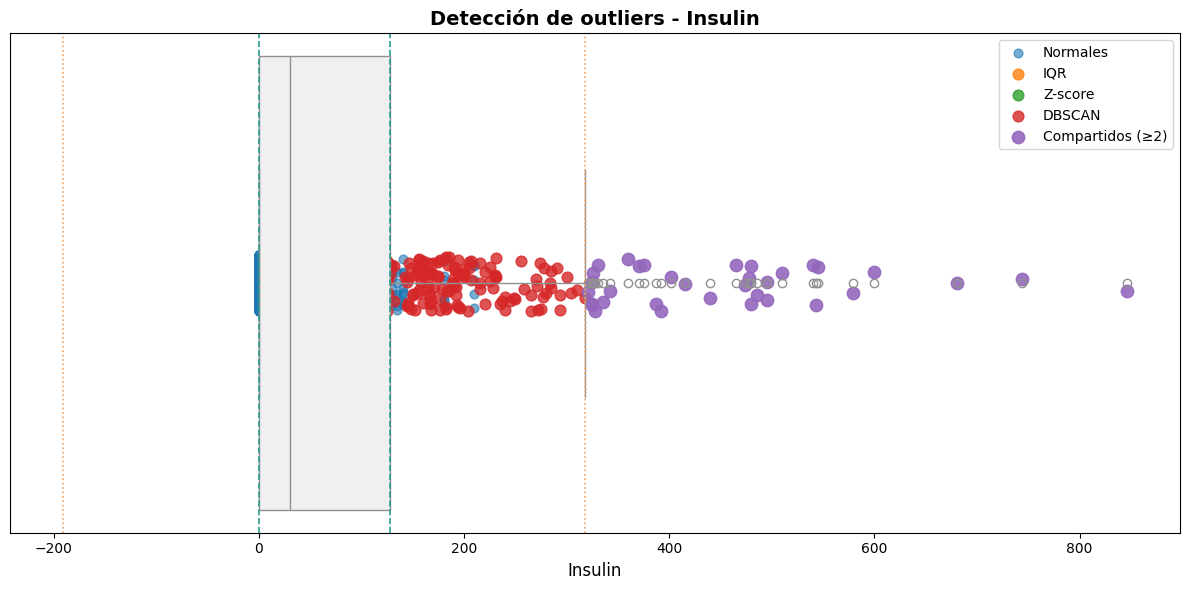

{'variable': 'Insulin',
 'Q1': np.float64(0.0),
 'Q3': np.float64(127.25),
 'IQR': np.float64(127.25),
 'lim_inf': np.float64(-190.875),
 'lim_sup': np.float64(318.125),
 'outliers_iqr': array([False, False, False, False, False, False, False, False,  True,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, Fals

In [13]:
detectar_outliers(df_csv, var="Insulin")

📊 Variable: BMI
 - Outliers IQR: 19 | Límites: 13.350 - 50.550
 - Outliers Z-score: 14
 - Outliers DBSCAN: 20
 - Compartidos (≥2 métodos): 19
 - Total de datos: 768


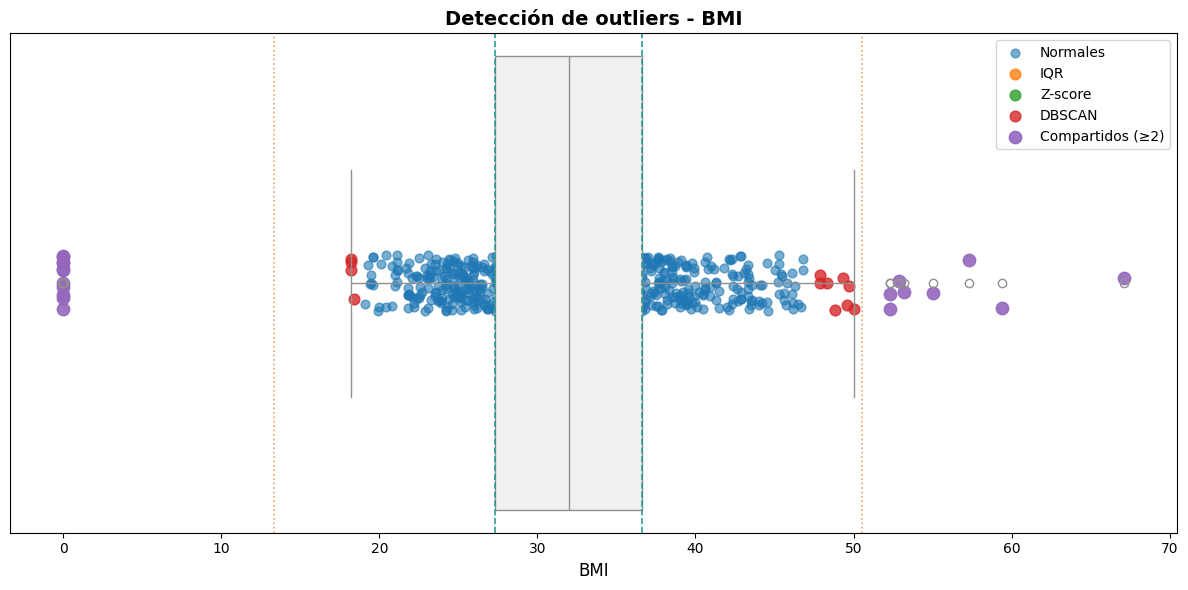

{'variable': 'BMI',
 'Q1': np.float64(27.3),
 'Q3': np.float64(36.6),
 'IQR': np.float64(9.3),
 'lim_inf': np.float64(13.35),
 'lim_sup': np.float64(50.550000000000004),
 'outliers_iqr': array([False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, Fals

In [14]:
detectar_outliers(df_csv, var="BMI")

📊 Variable: DiabetesPedigreeFunction
 - Outliers IQR: 29 | Límites: -0.330 - 1.200
 - Outliers Z-score: 11
 - Outliers DBSCAN: 0
 - Compartidos (≥2 métodos): 11
 - Total de datos: 768


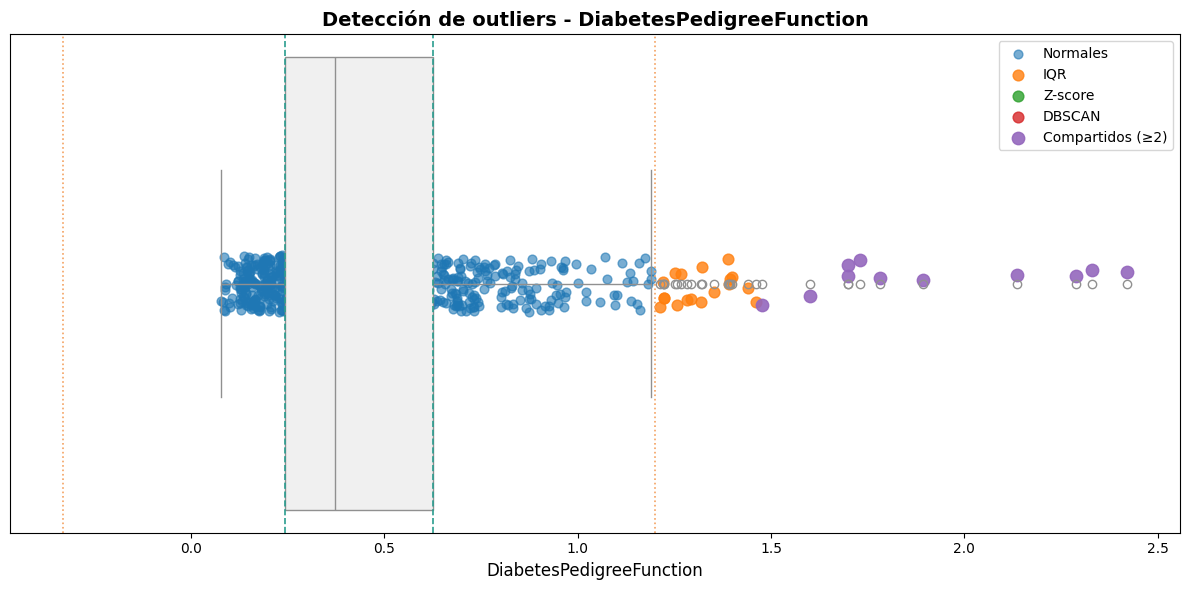

{'variable': 'DiabetesPedigreeFunction',
 'Q1': np.float64(0.24375),
 'Q3': np.float64(0.62625),
 'IQR': np.float64(0.38249999999999995),
 'lim_inf': np.float64(-0.32999999999999996),
 'lim_sup': np.float64(1.2),
 'outliers_iqr': array([False, False, False, False,  True, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fals

In [15]:
detectar_outliers(df_csv, var="DiabetesPedigreeFunction")

📊 Variable: Age
 - Outliers IQR: 9 | Límites: -1.500 - 66.500
 - Outliers Z-score: 5
 - Outliers DBSCAN: 37
 - Compartidos (≥2 métodos): 9
 - Total de datos: 768


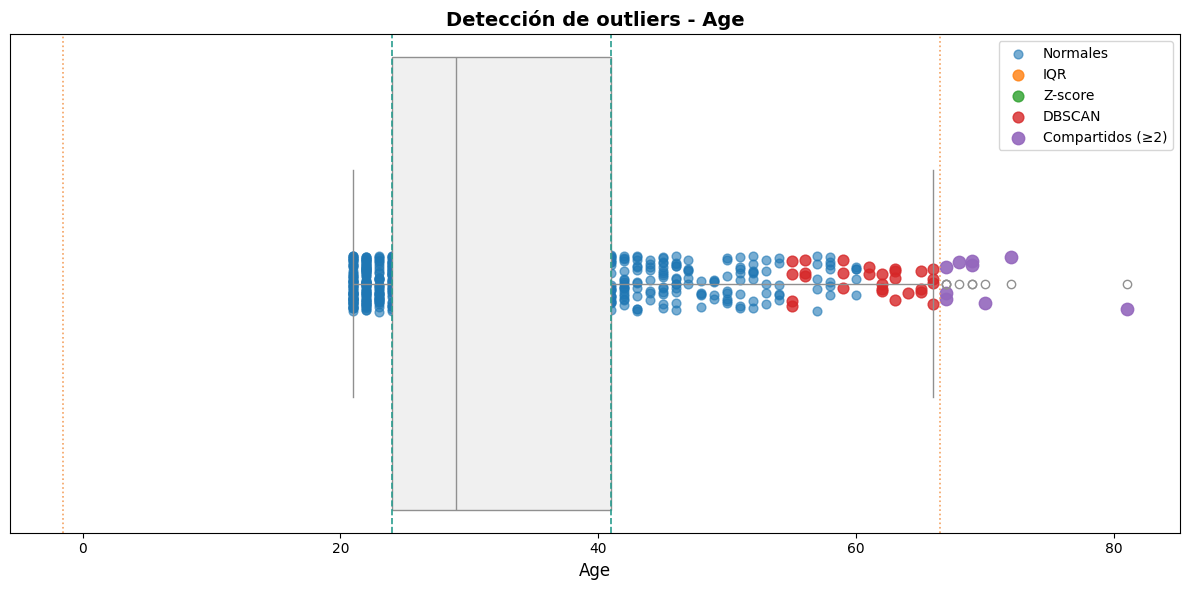

{'variable': 'Age',
 'Q1': np.float64(24.0),
 'Q3': np.float64(41.0),
 'IQR': np.float64(17.0),
 'lim_inf': np.float64(-1.5),
 'lim_sup': np.float64(66.5),
 'outliers_iqr': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, Fals

In [16]:
detectar_outliers(df_csv, var="Age")

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_variable(df, var, target='Outcome'):
    """
    Genera histograma + KDE y boxplot para una sola variable numérica.

    Parámetros:
    -----------
    df : DataFrame
        DataFrame completo.
    var : str
        Nombre de la variable numérica a analizar.
    target : str
        Columna objetivo para agrupar (default = 'Outcome').
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f'Análisis de la variable: {var}', fontsize=16, y=1.02)

    # --- Histograma + KDE ---
    sns.histplot(data=df, x=var, hue=target, kde=True, ax=axes[0])
    axes[0].set_title('Histograma + Densidad (por Outcome)')

    # --- Boxplot ---
    sns.boxplot(data=df, x=target, y=var, ax=axes[1])
    axes[1].set_title('Boxplot (por Outcome)')

    plt.tight_layout()
    plt.show()


In [18]:
df_logs = df_csv.copy()

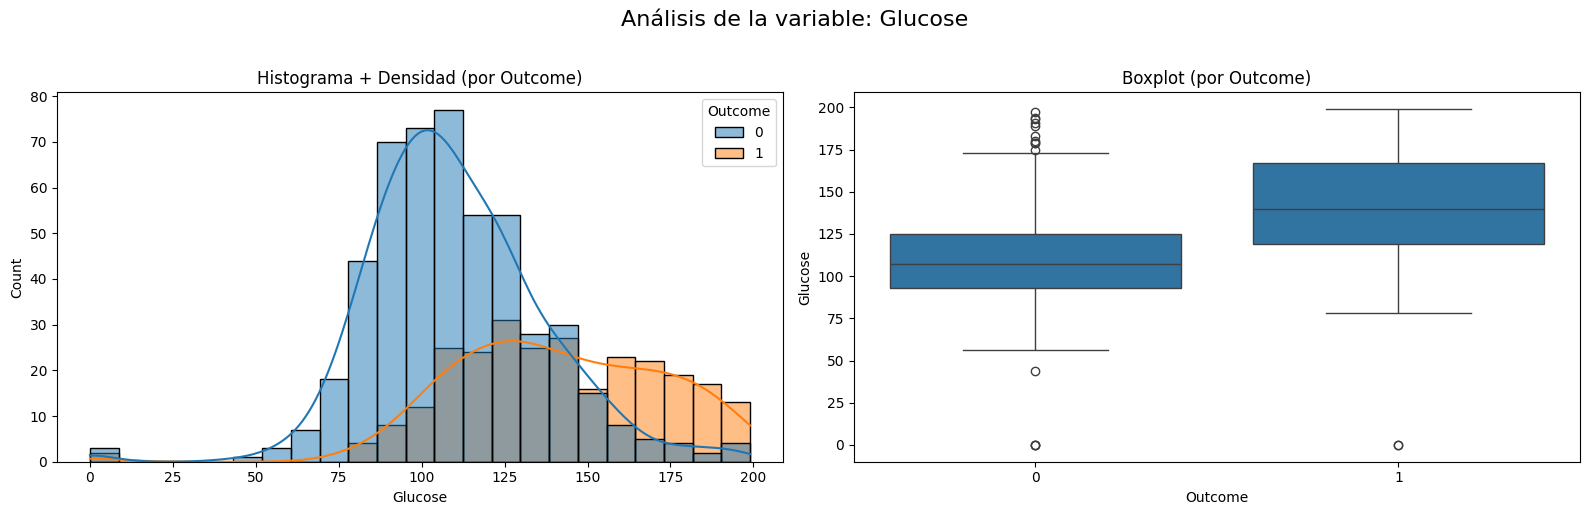

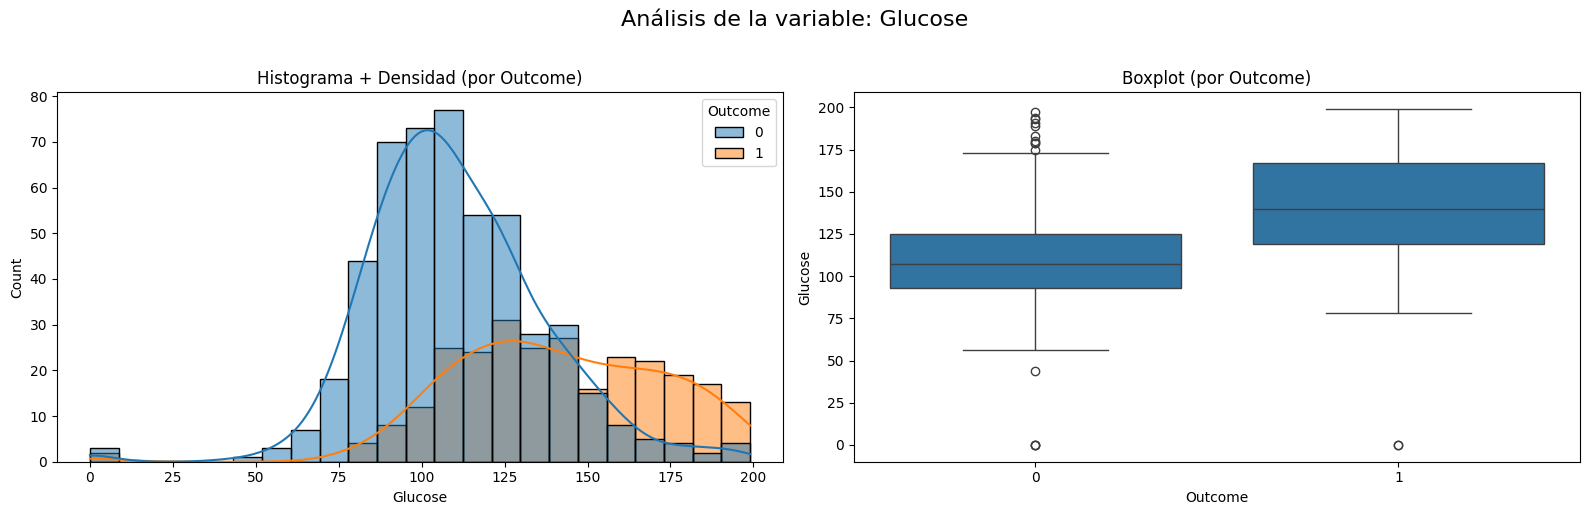

In [19]:
analizar_variable(df_csv, "Glucose")
analizar_variable(df_logs, "Glucose")


Variable Fare sin transformación:


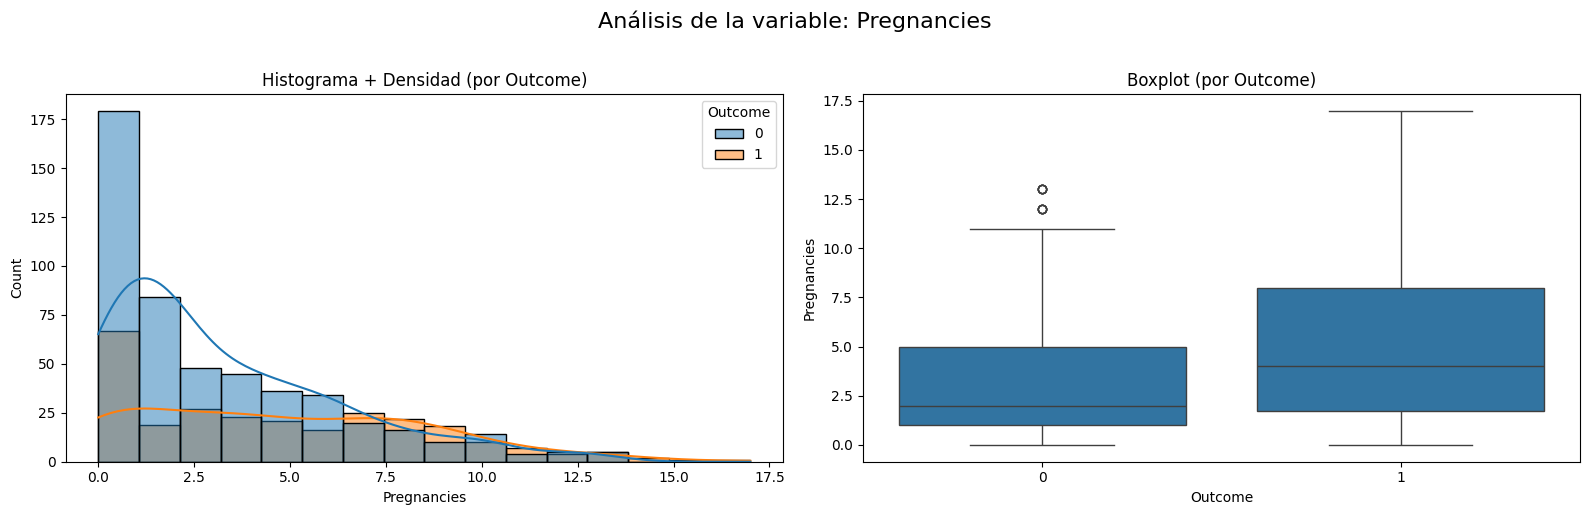


Varaible Fare con transformación Logarítmica:


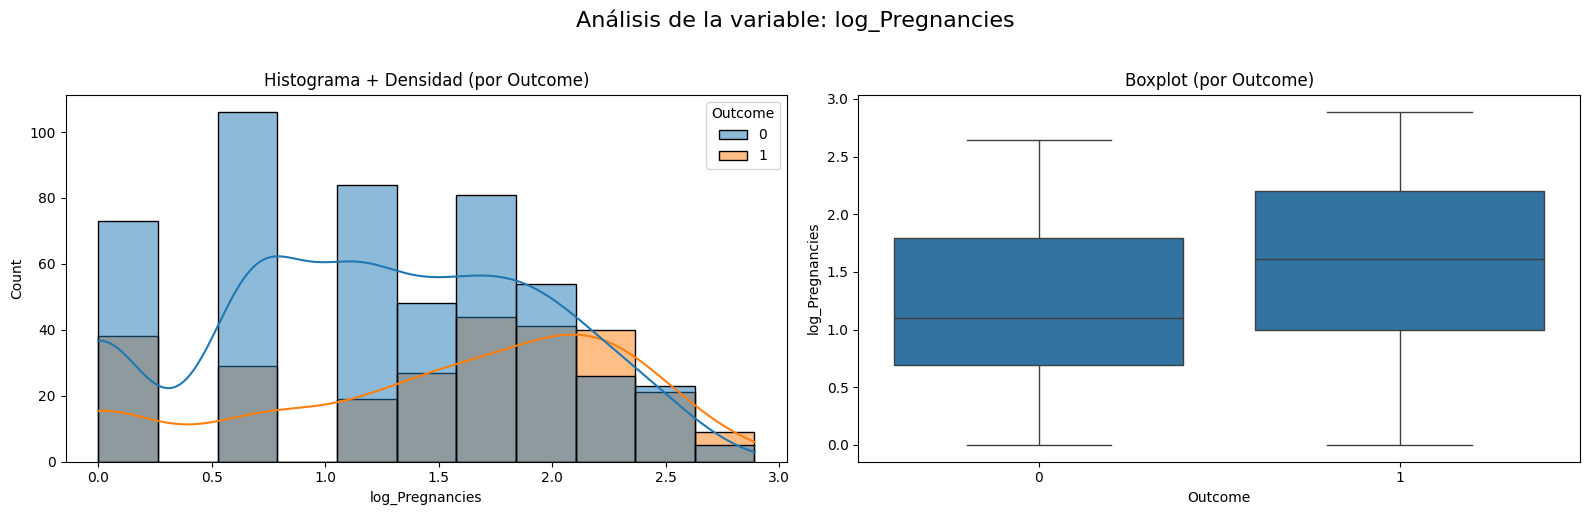

In [20]:
df_logs['log_Pregnancies'] = np.log(df_csv['Pregnancies'] + 1)
print("Variable Fare sin transformación:")
analizar_variable(df_csv, "Pregnancies")

print("\nVaraible Fare con transformación Logarítmica:")
analizar_variable(df_logs, "log_Pregnancies")


Variable Glucose sin transformación:


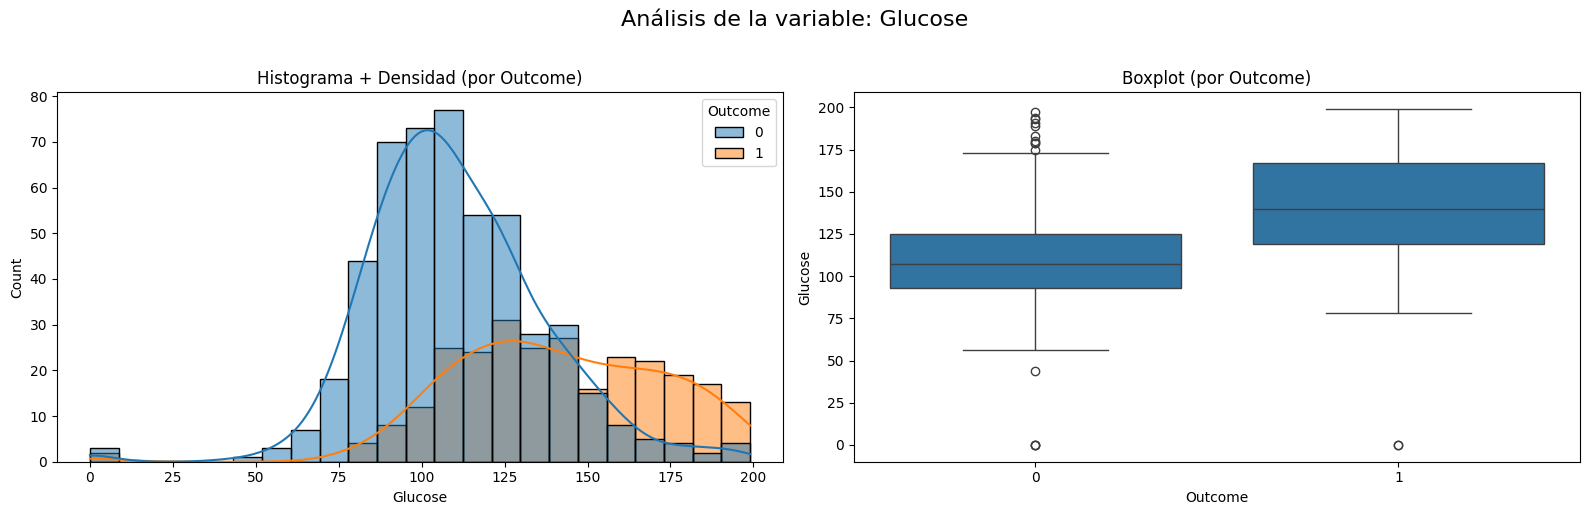


Varaible Glucose con transformación Logarítmica:


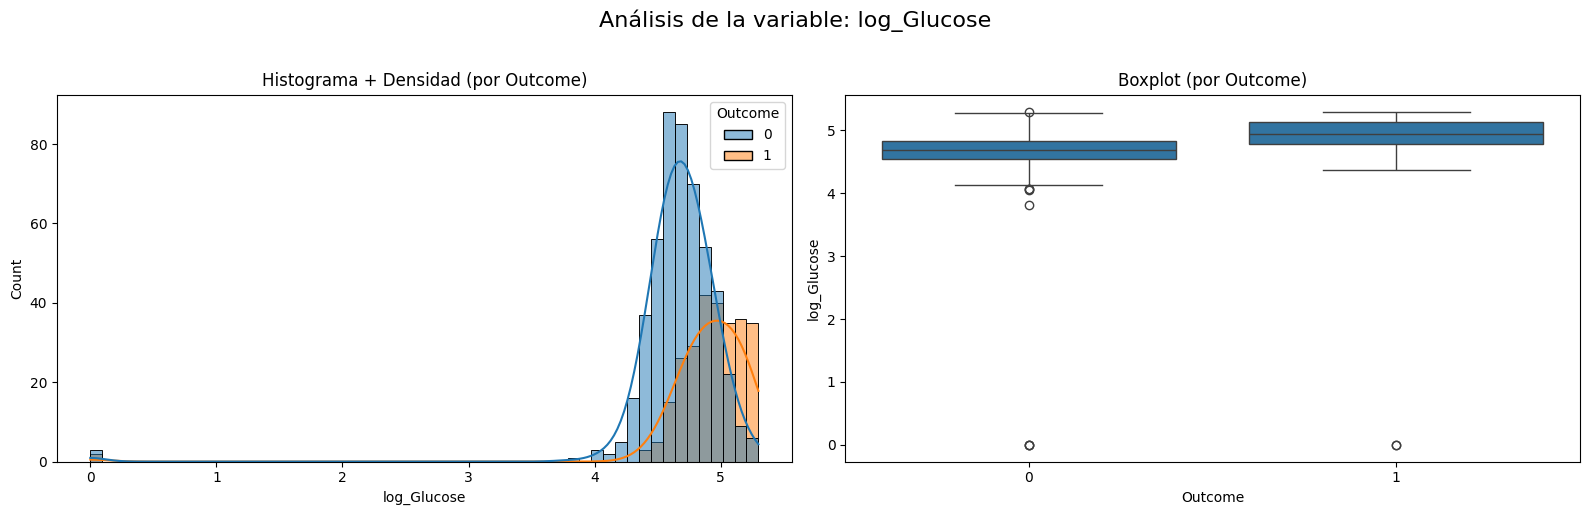

In [21]:
df_logs['log_Glucose'] = np.log(df_csv['Glucose'] + 1)
print("Variable Glucose sin transformación:")
analizar_variable(df_csv, "Glucose")


print("\nVaraible Glucose con transformación Logarítmica:")
analizar_variable(df_logs, "log_Glucose")



Variable BloodPressure sin transformación:


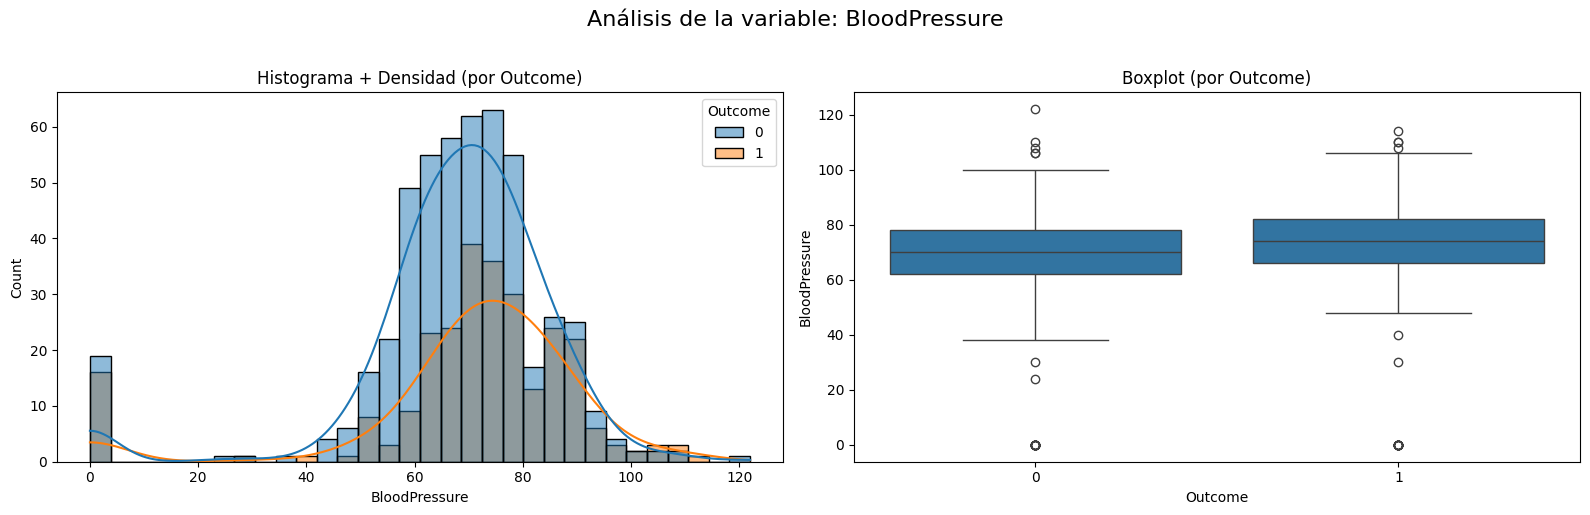


Varaible BloodPressure con transformación Logarítmica:


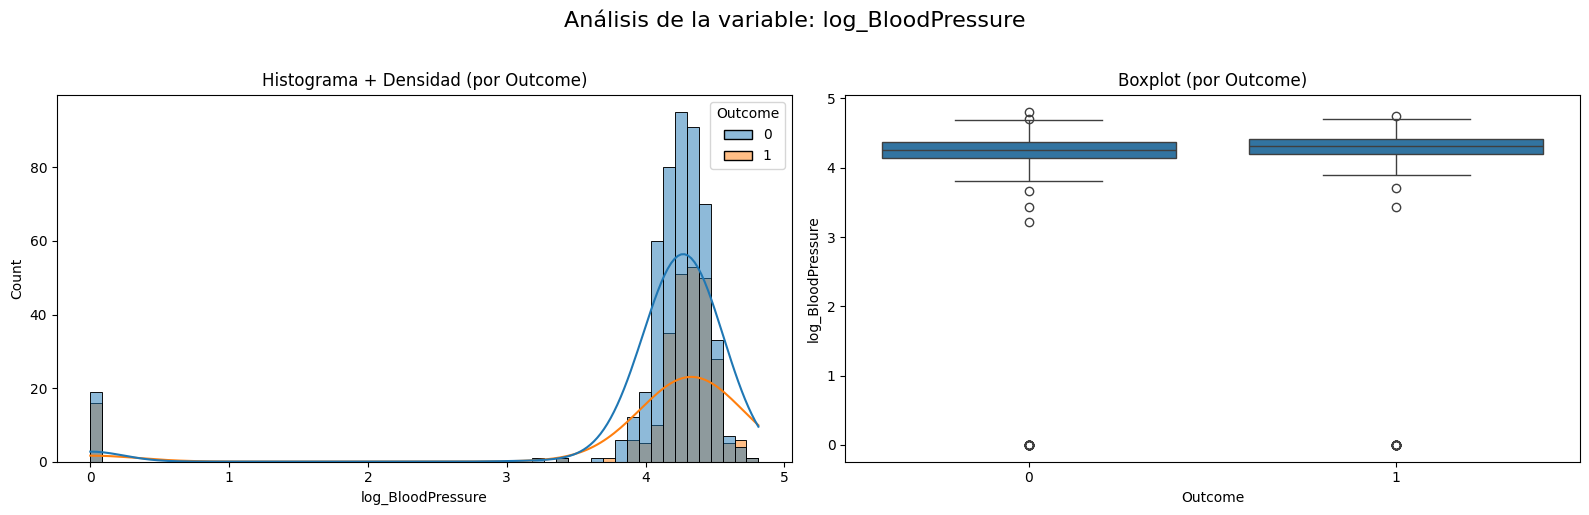

In [22]:
df_logs['log_BloodPressure'] = np.log(df_csv['BloodPressure'] + 1)
print("Variable BloodPressure sin transformación:")
analizar_variable(df_csv, "BloodPressure")


print("\nVaraible BloodPressure con transformación Logarítmica:")
analizar_variable(df_logs, "log_BloodPressure")



Variable SkinThickness sin transformación:


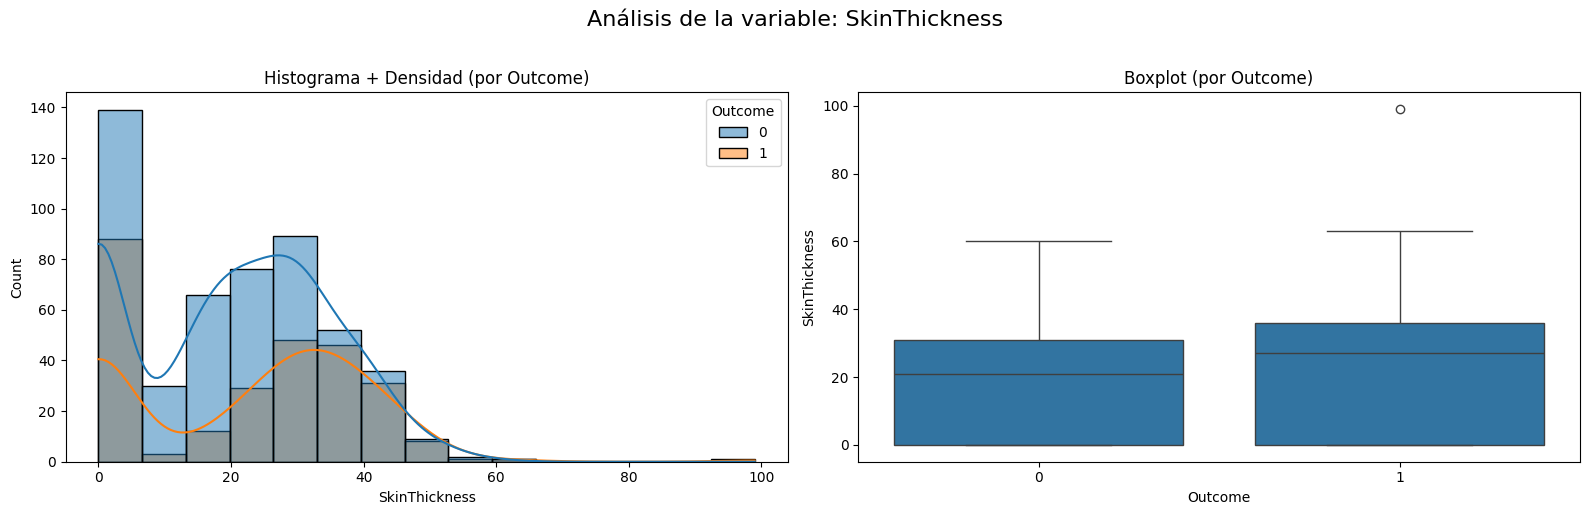


Varaible SkinThickness con transformación Logarítmica:


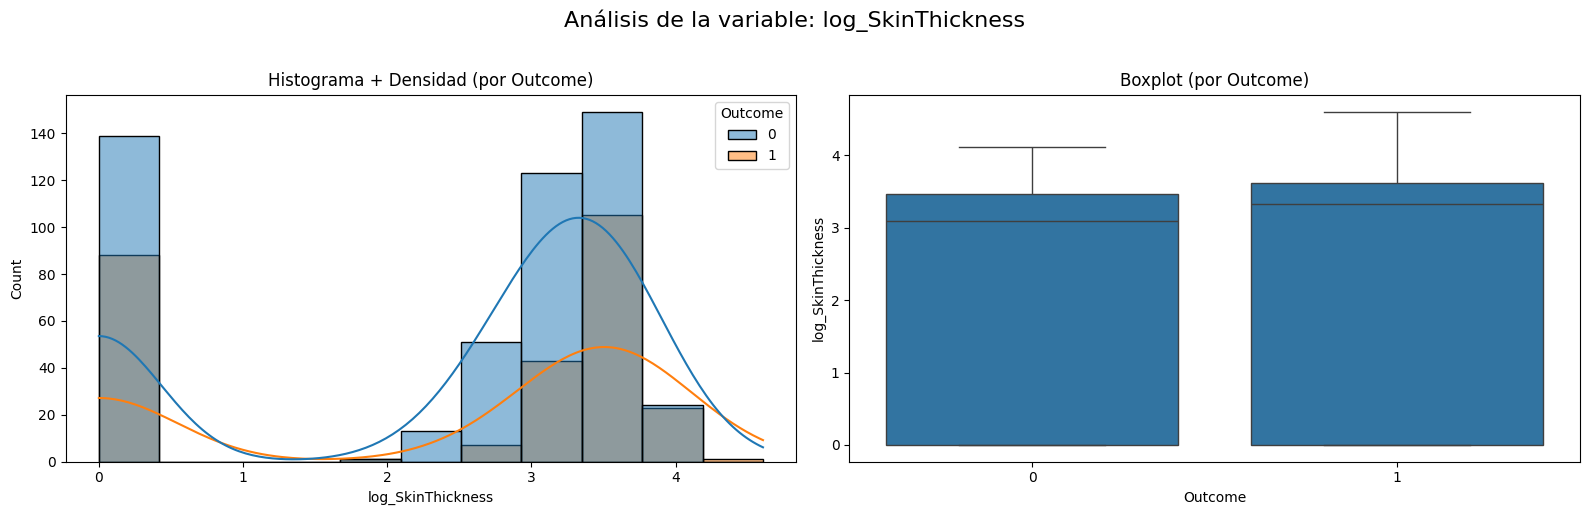

In [23]:
df_logs['log_SkinThickness'] = np.log(df_csv['SkinThickness'] + 1)
print("Variable SkinThickness sin transformación:")
analizar_variable(df_csv, "SkinThickness")


print("\nVaraible SkinThickness con transformación Logarítmica:")
analizar_variable(df_logs, "log_SkinThickness")



Variable Insulin sin transformación:


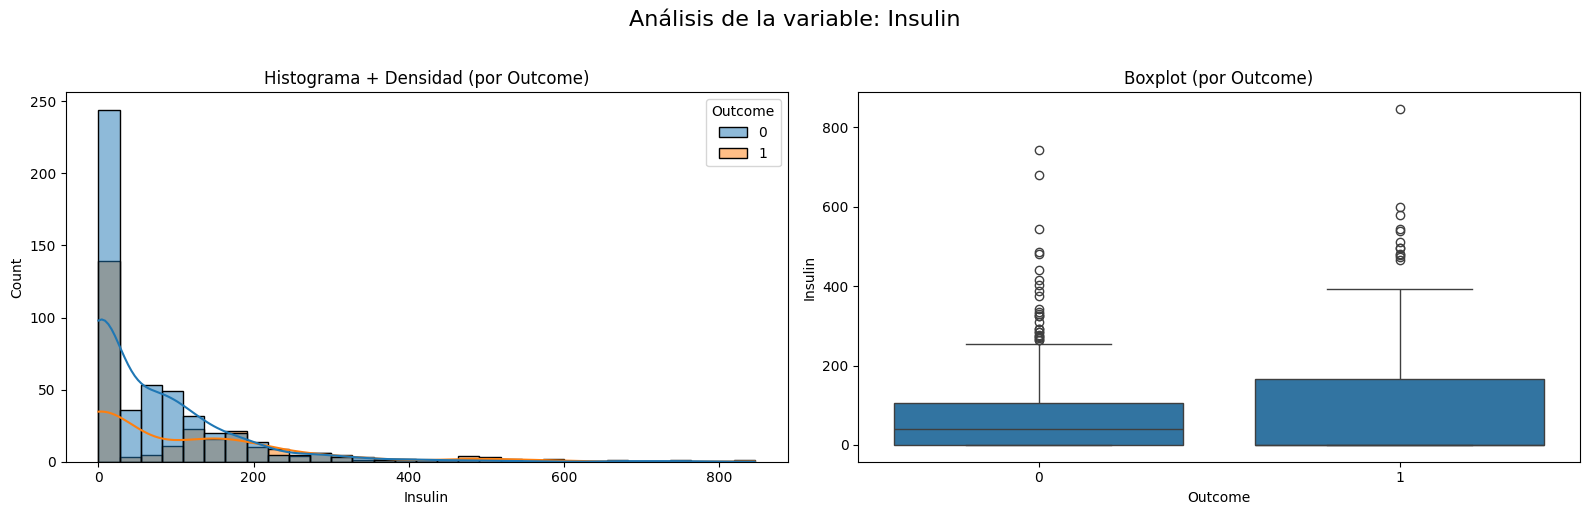


Varaible Insulin con transformación Logarítmica:


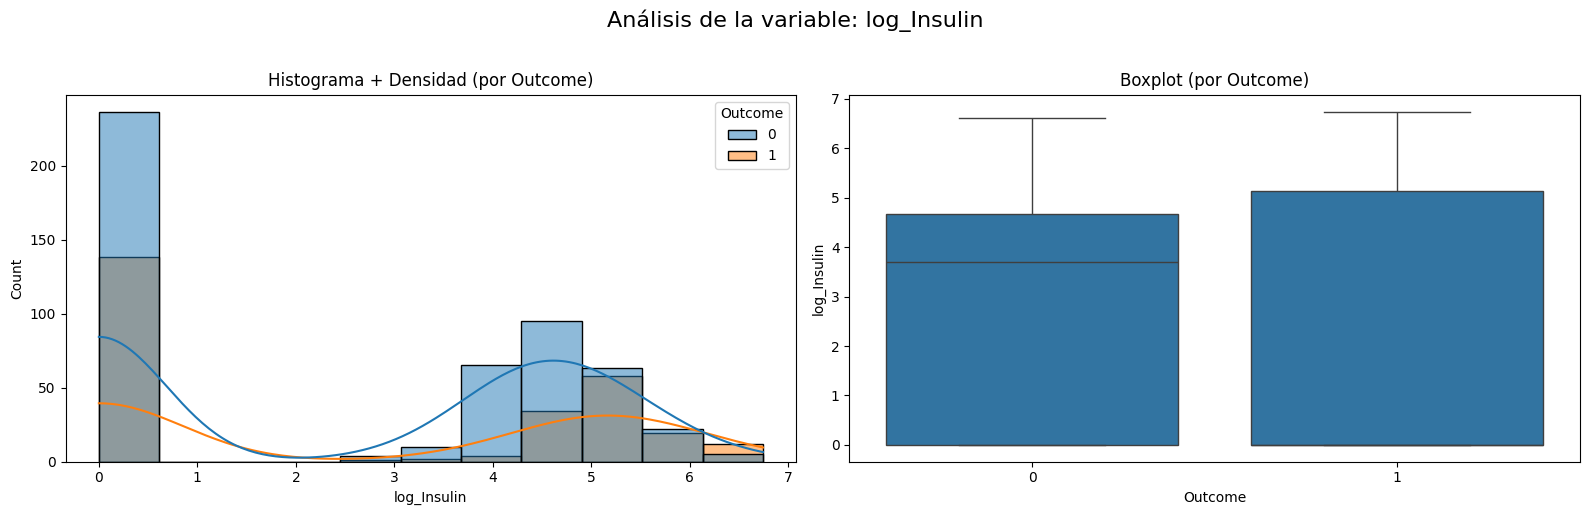

In [24]:
df_logs['log_Insulin'] = np.log(df_csv['Insulin'] + 1)
print("Variable Insulin sin transformación:")
analizar_variable(df_csv, "Insulin")


print("\nVaraible Insulin con transformación Logarítmica:")
analizar_variable(df_logs, "log_Insulin")



Variable BMI sin transformación:


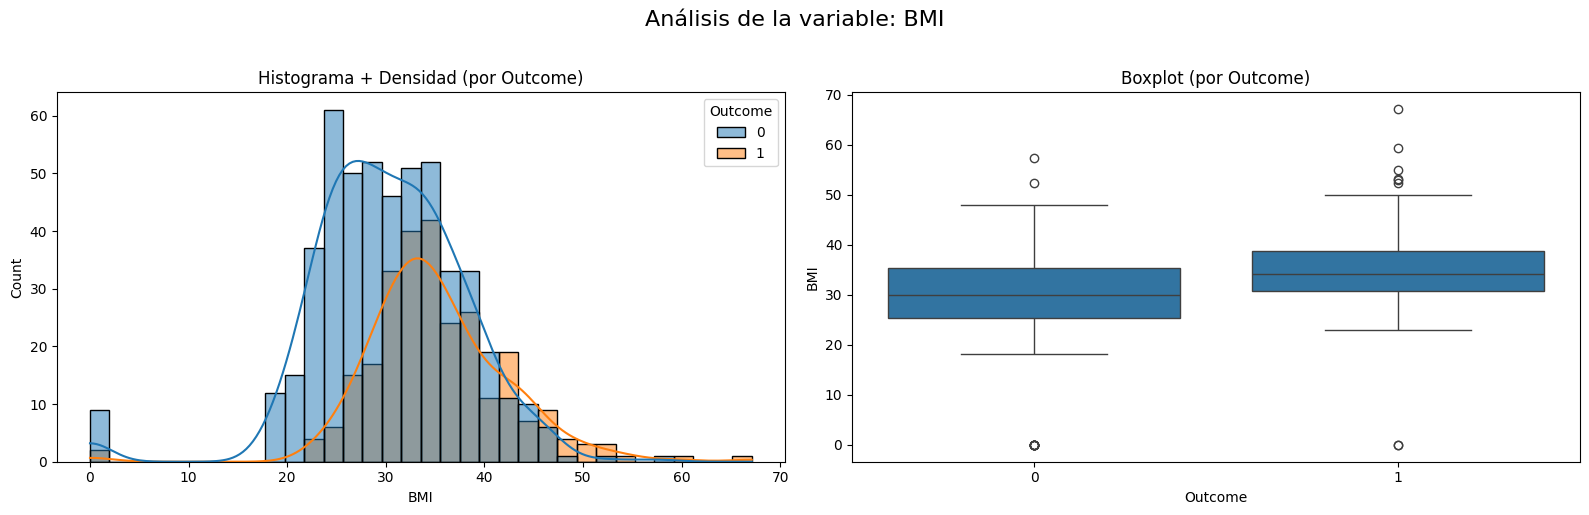


Varaible BMI con transformación Logarítmica:


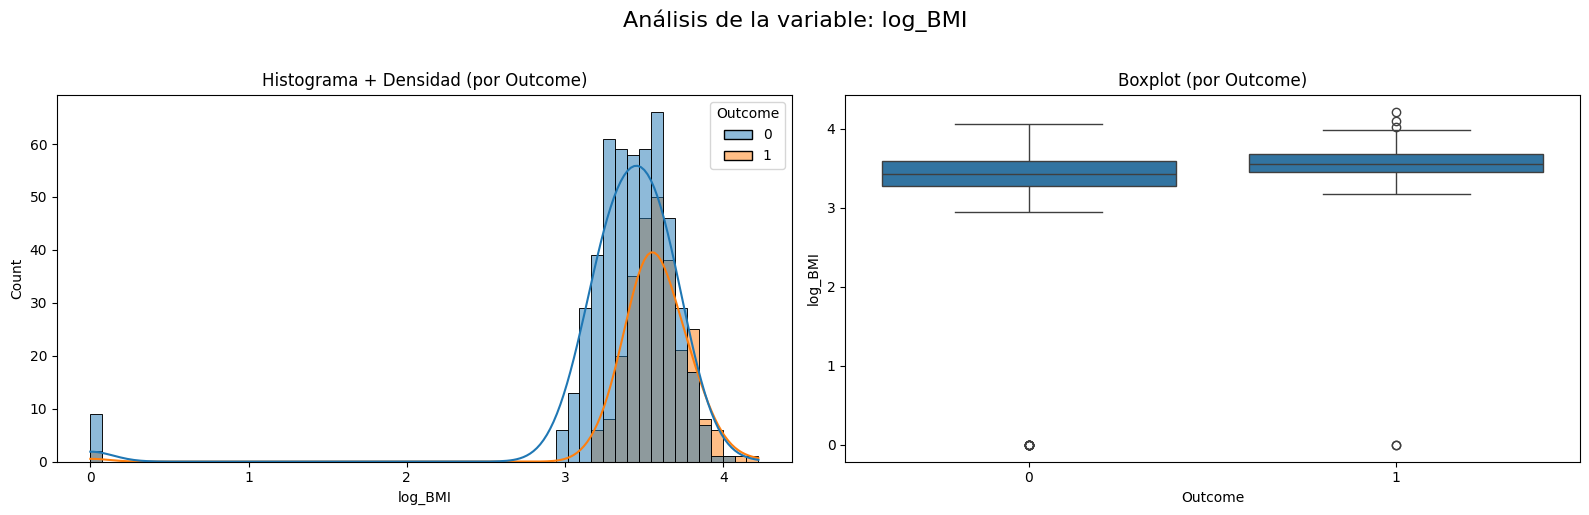

In [25]:
df_logs['log_BMI'] = np.log(df_csv['BMI'] + 1)
print("Variable BMI sin transformación:")
analizar_variable(df_csv, "BMI")


print("\nVaraible BMI con transformación Logarítmica:")
analizar_variable(df_logs, "log_BMI")



Variable DiabetesPedigreeFunction sin transformación:


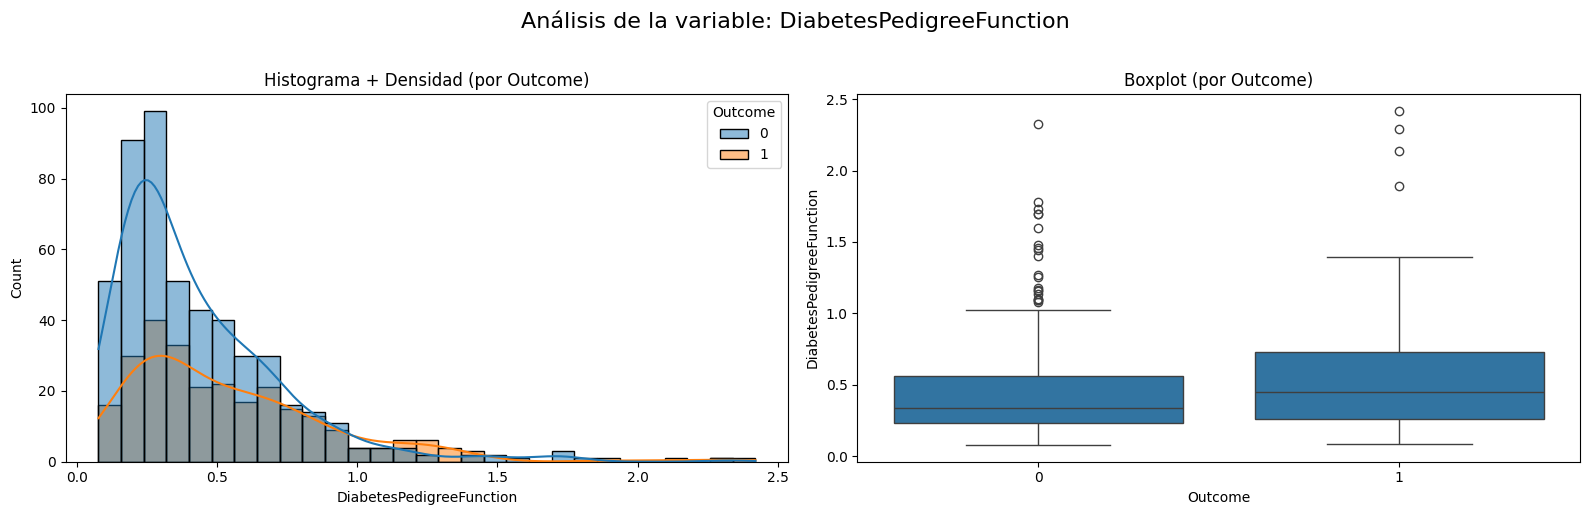


Varaible DiabetesPedigreeFunction con transformación Logarítmica:


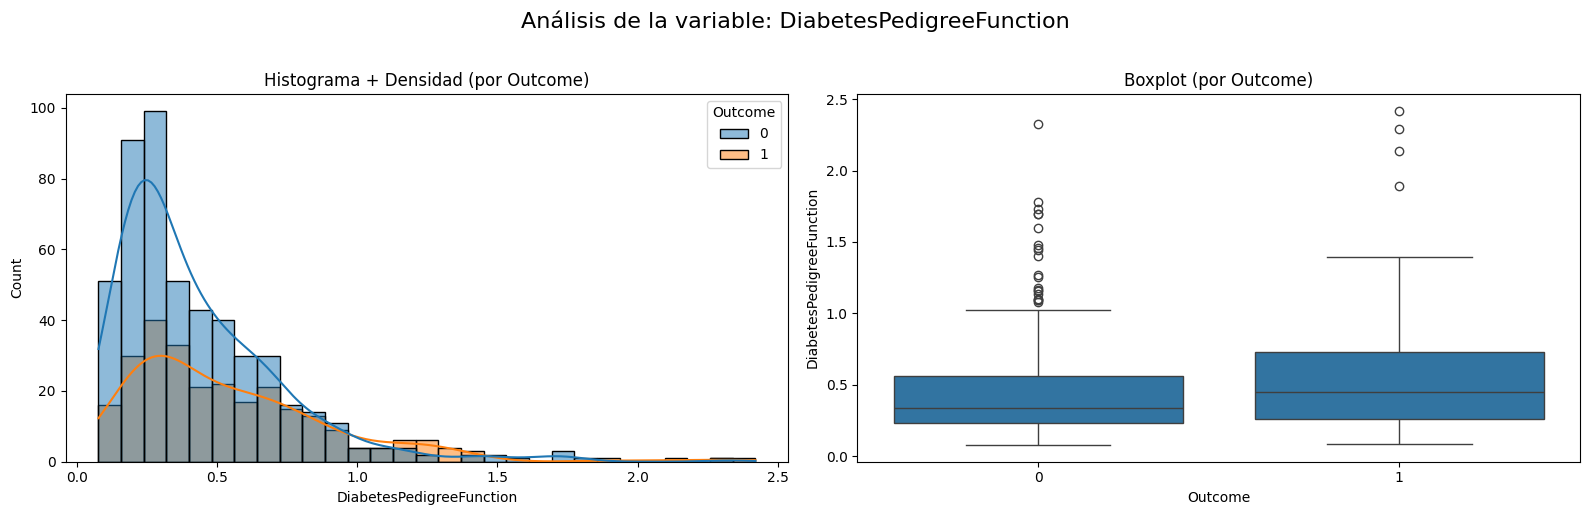

In [26]:
df_logs['log_DiabetesPedigreeFunction'] = np.log(df_csv['DiabetesPedigreeFunction'] + 1)
print("Variable DiabetesPedigreeFunction sin transformación:")
analizar_variable(df_csv, "DiabetesPedigreeFunction")


print("\nVaraible DiabetesPedigreeFunction con transformación Logarítmica:")
analizar_variable(df_logs, "DiabetesPedigreeFunction")



Variable Age sin transformación:


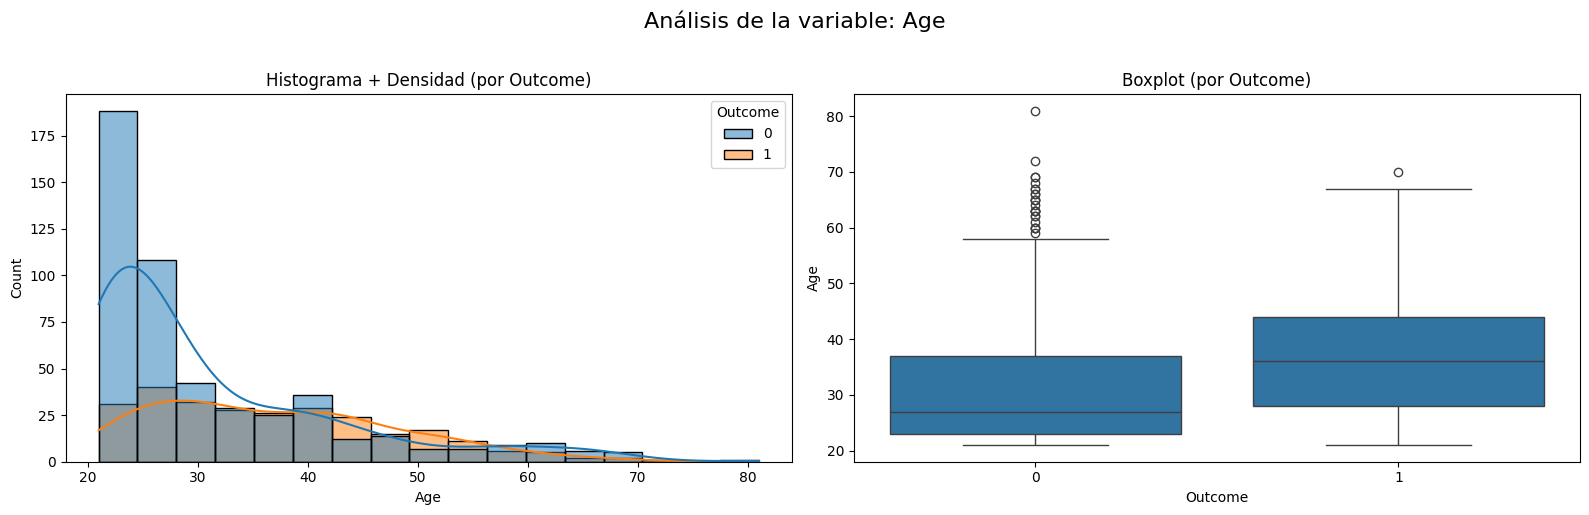


Varaible Age con transformación Logarítmica:


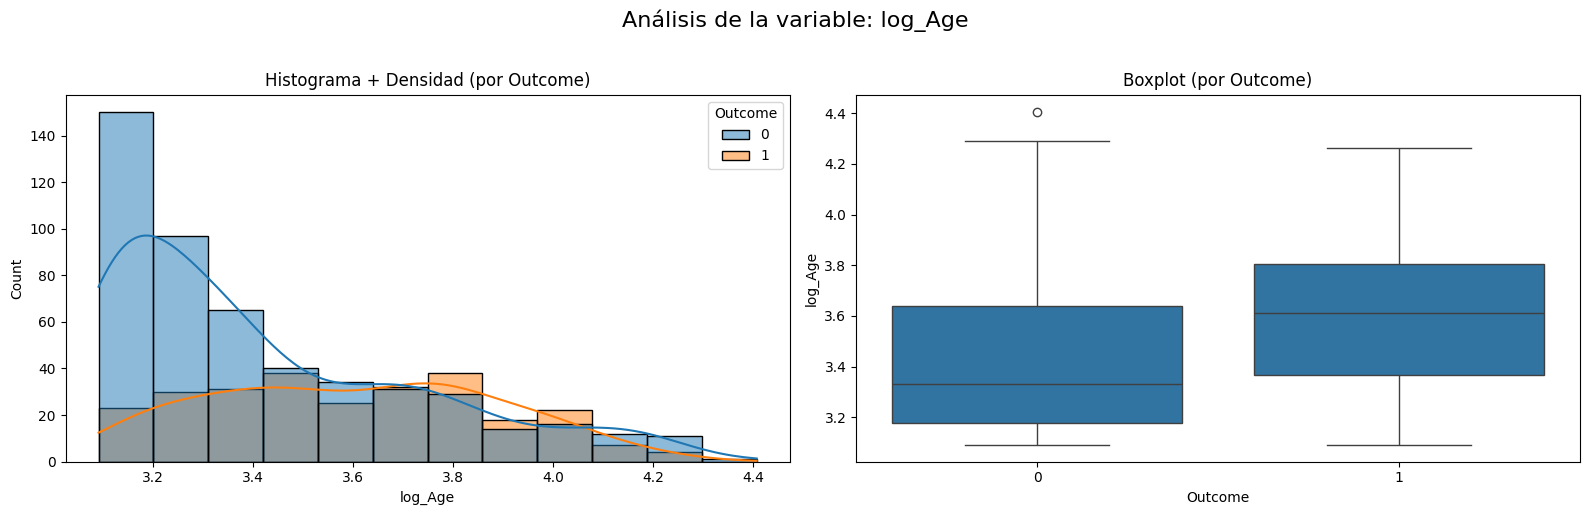

In [27]:
df_logs['log_Age'] = np.log(df_csv['Age'] + 1)
print("Variable Age sin transformación:")
analizar_variable(df_csv, "Age")


print("\nVaraible Age con transformación Logarítmica:")
analizar_variable(df_logs, "log_Age")



In [28]:
df_box = df_csv.copy()

El lambda óptimo encontrado fue: 0.17272363170831742

Variable Pregnancies sin transformación:


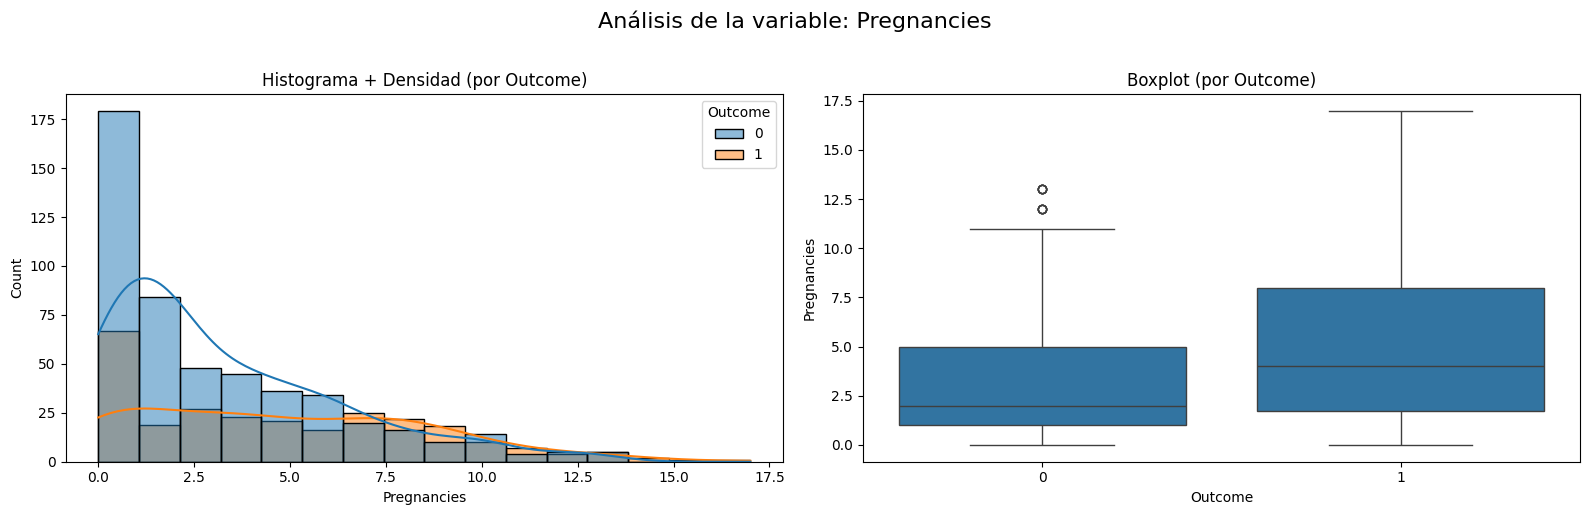


Variable Pregnancies con transformación Box-Cox:


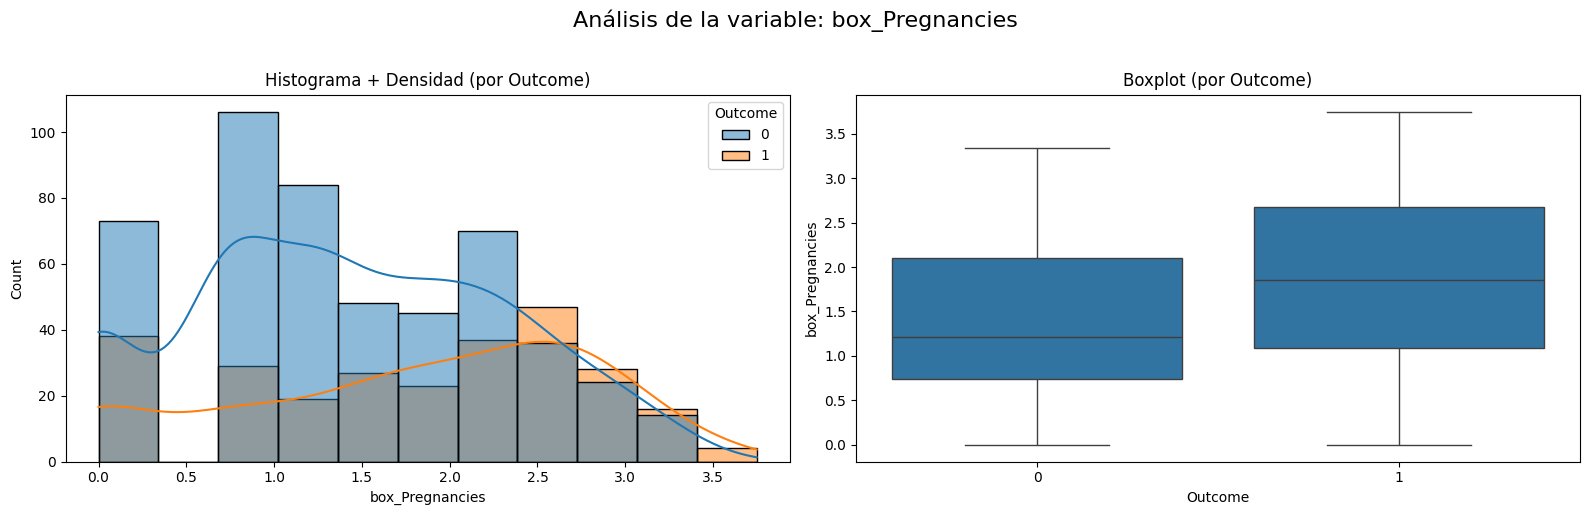

In [29]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['Pregnancies'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_Pregnancies'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable Pregnancies sin transformación:")
analizar_variable(df_csv, "Pregnancies")


print("\nVariable Pregnancies con transformación Box-Cox:")
analizar_variable(df_box, "box_Pregnancies")



El lambda óptimo encontrado fue: 0.9664046990580646

Variable Glucose sin transformación:


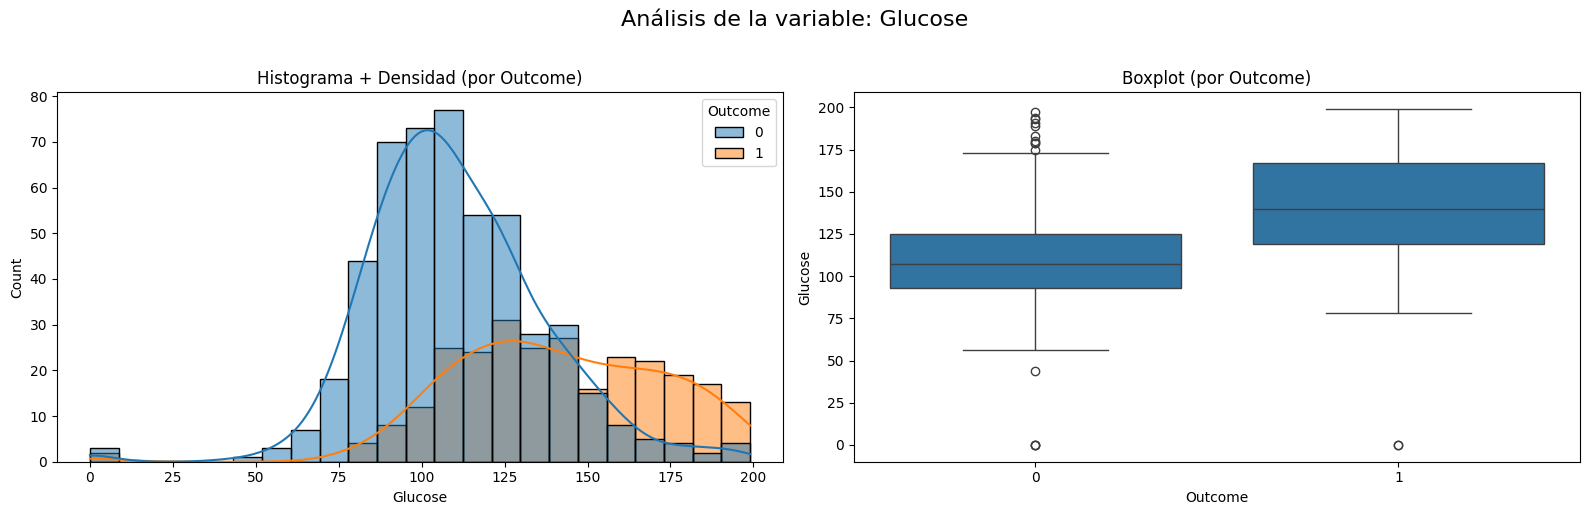


Variable Glucose con transformación Box-Cox:


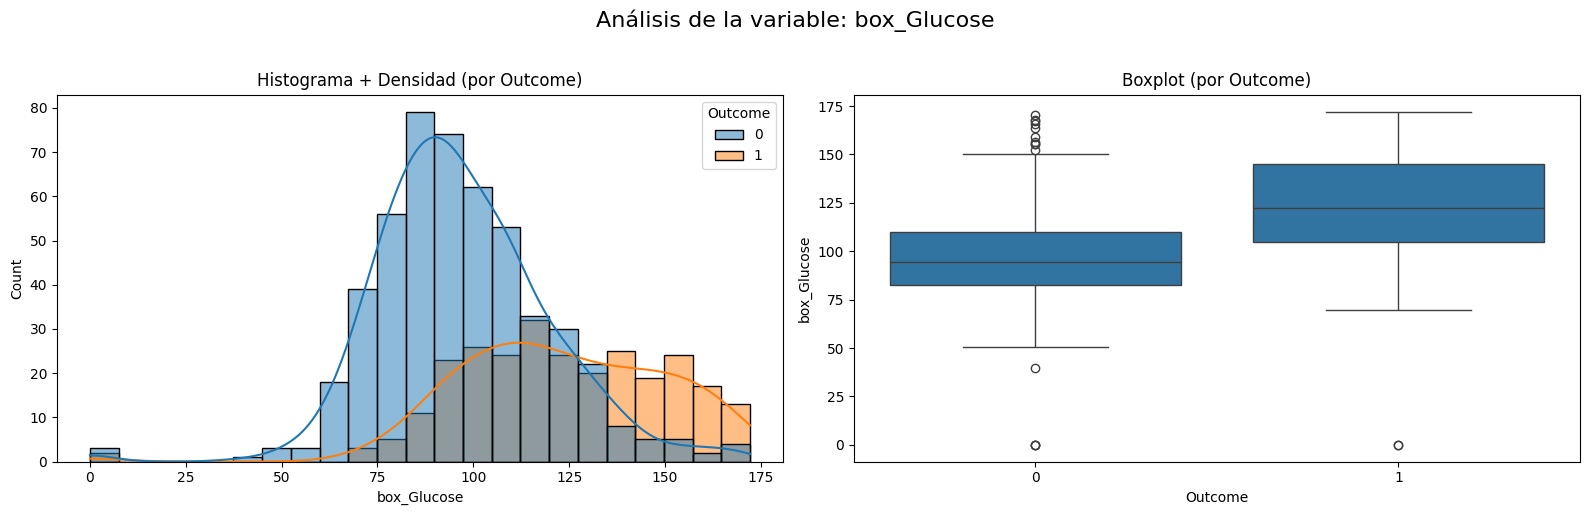

In [30]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['Glucose'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_Glucose'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable Glucose sin transformación:")
analizar_variable(df_csv, "Glucose")


print("\nVariable Glucose con transformación Box-Cox:")
analizar_variable(df_box, "box_Glucose")


El lambda óptimo encontrado fue: 1.606631468346021

Variable BloodPressure sin transformación:


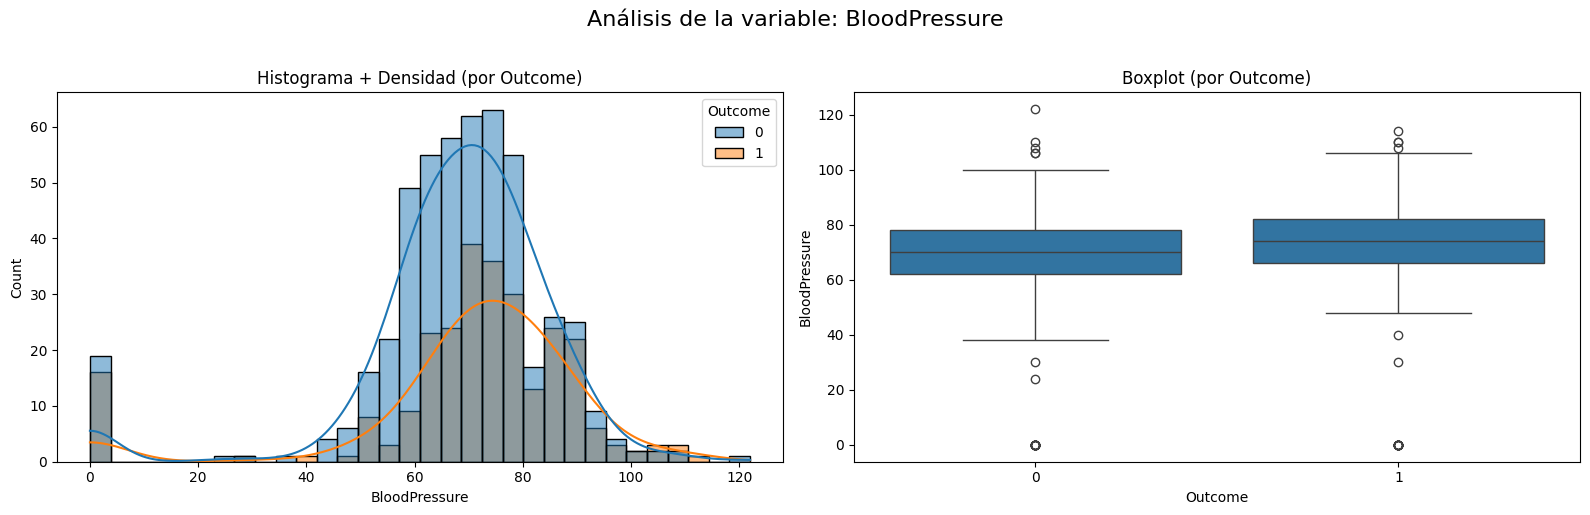


Variable BloodPressure con transformación Box-Cox:


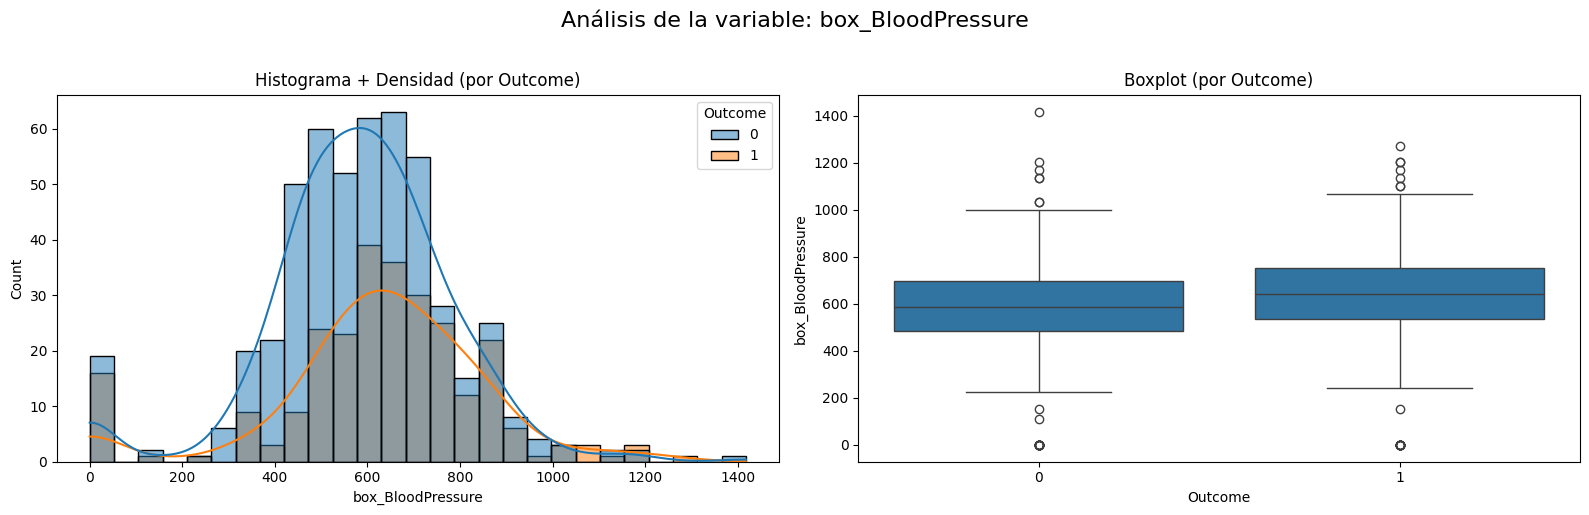

In [31]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['BloodPressure'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_BloodPressure'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable BloodPressure sin transformación:")
analizar_variable(df_csv, "BloodPressure")


print("\nVariable BloodPressure con transformación Box-Cox:")
analizar_variable(df_box, "box_BloodPressure")


El lambda óptimo encontrado fue: 0.511566325819151

Variable SkinThickness sin transformación:


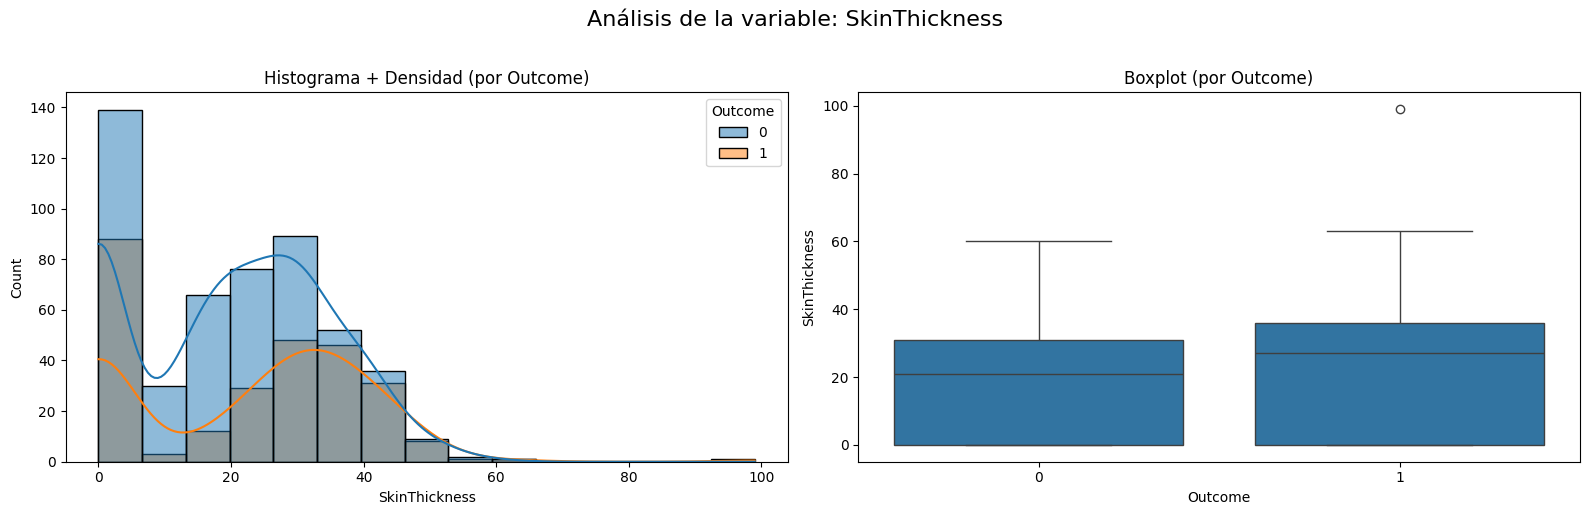


Variable SkinThickness con transformación Box-Cox:


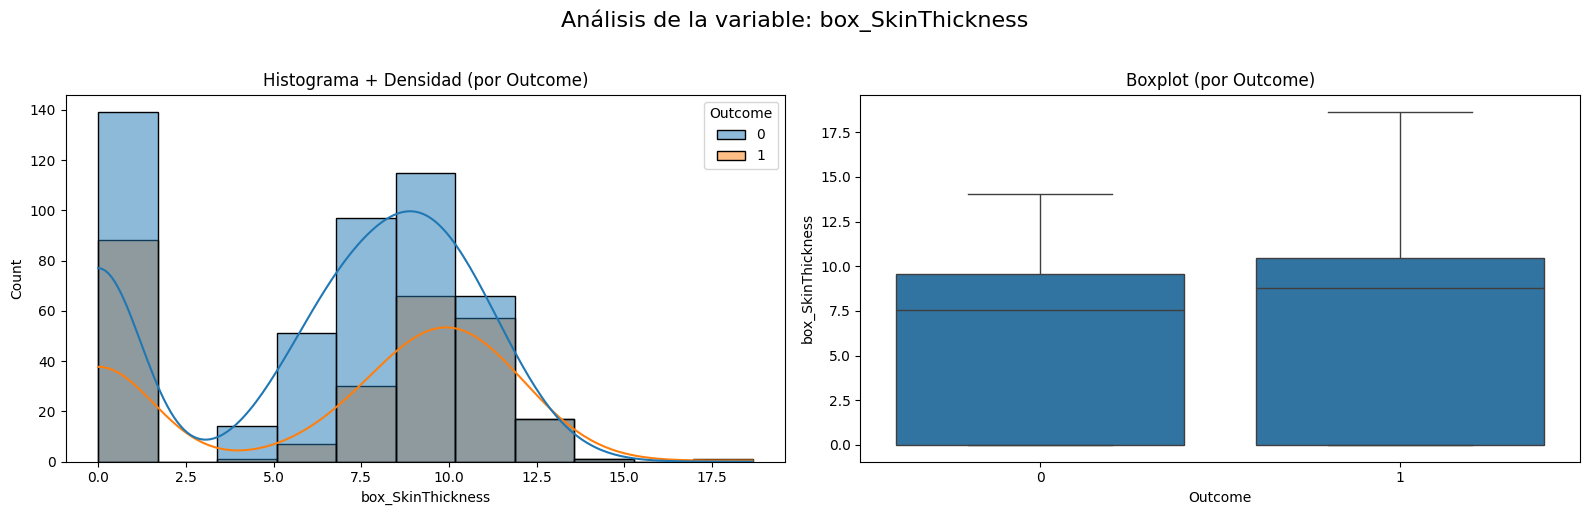

In [32]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['SkinThickness'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_SkinThickness'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable SkinThickness sin transformación:")
analizar_variable(df_csv, "SkinThickness")


print("\nVariable SkinThickness con transformación Box-Cox:")
analizar_variable(df_box, "box_SkinThickness")


El lambda óptimo encontrado fue: -0.03228486308581775

Variable Insulin sin transformación:


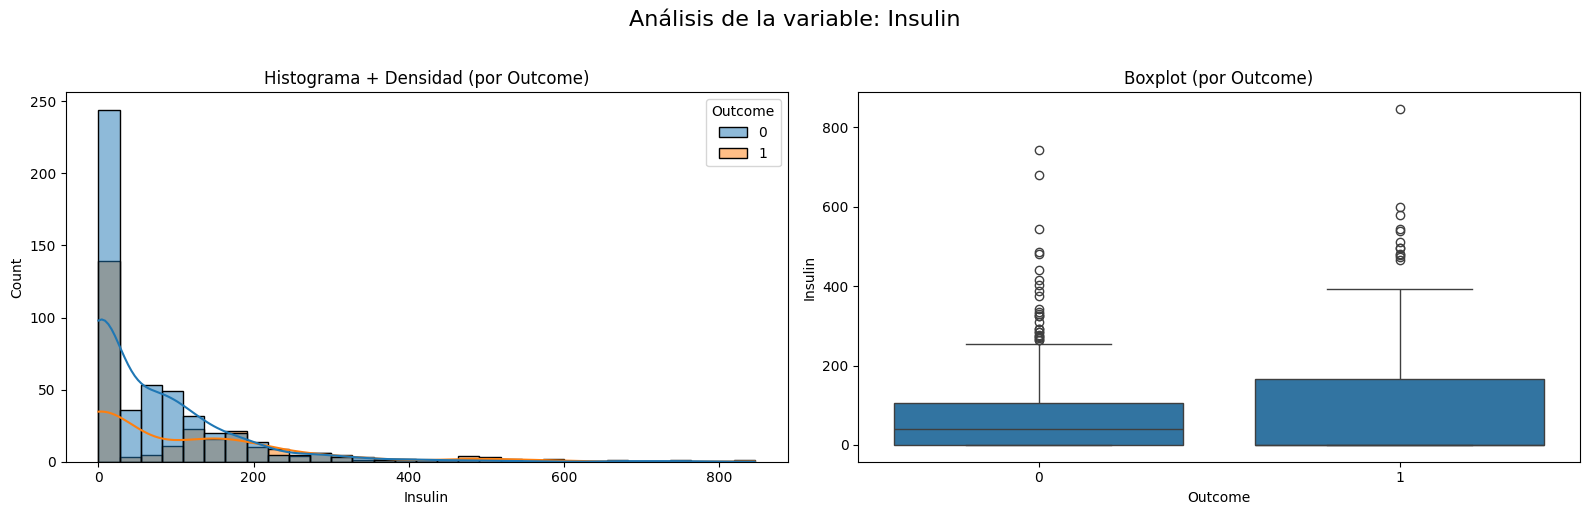


Variable Insulin con transformación Box-Cox:


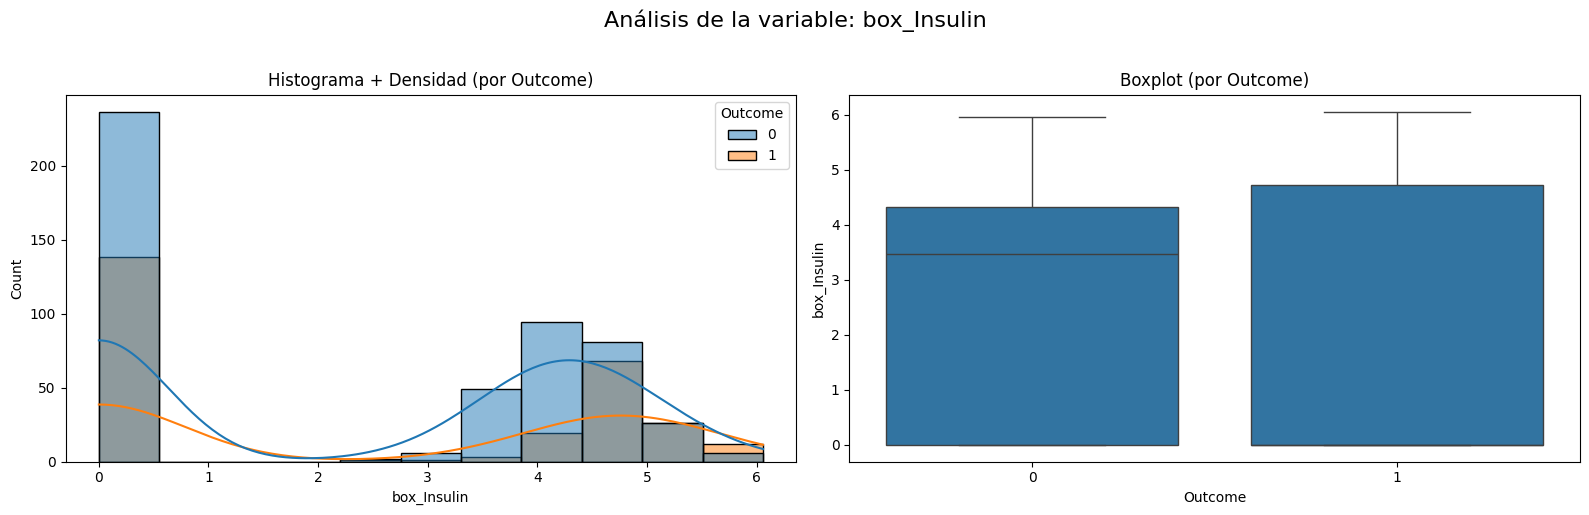

In [33]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['Insulin'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_Insulin'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable Insulin sin transformación:")
analizar_variable(df_csv, "Insulin")


print("\nVariable Insulin con transformación Box-Cox:")
analizar_variable(df_box, "box_Insulin")


El lambda óptimo encontrado fue: 1.2765663223557264

Variable BMI sin transformación:


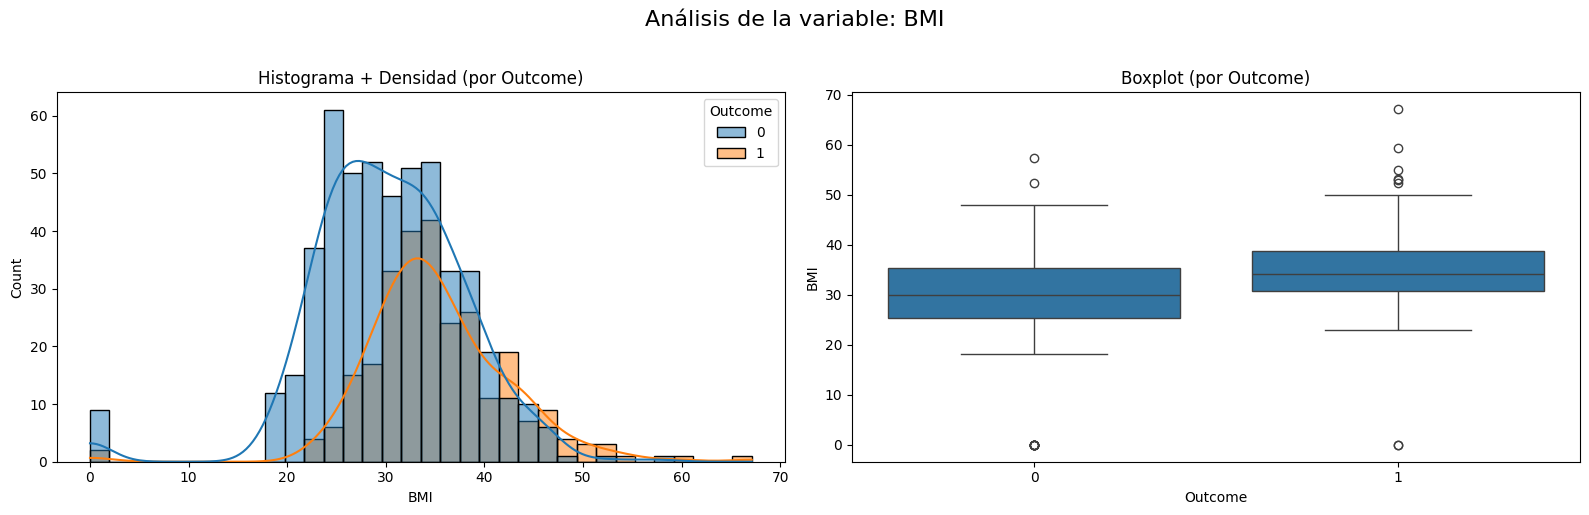


Variable BMI con transformación Box-Cox:


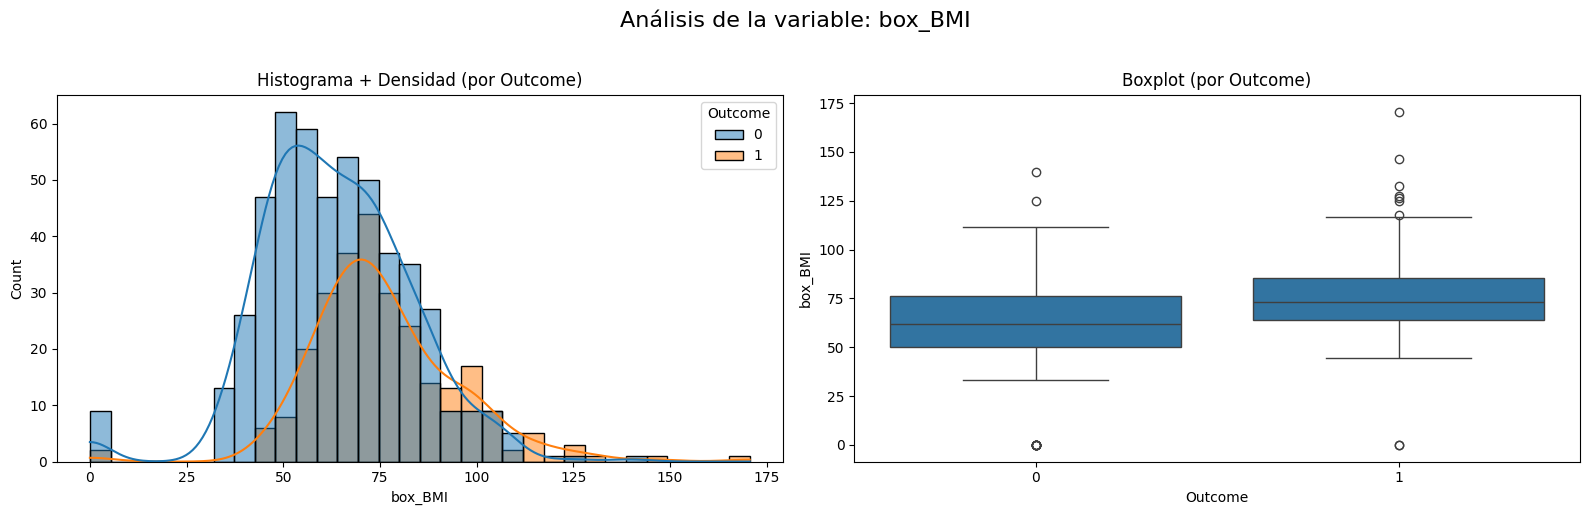

In [34]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['BMI'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_BMI'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable BMI sin transformación:")
analizar_variable(df_csv, "BMI")


print("\nVariable BMI con transformación Box-Cox:")
analizar_variable(df_box, "box_BMI")


El lambda óptimo encontrado fue: -2.2503869222142816

Variable DiabetesPedigreeFunction sin transformación:


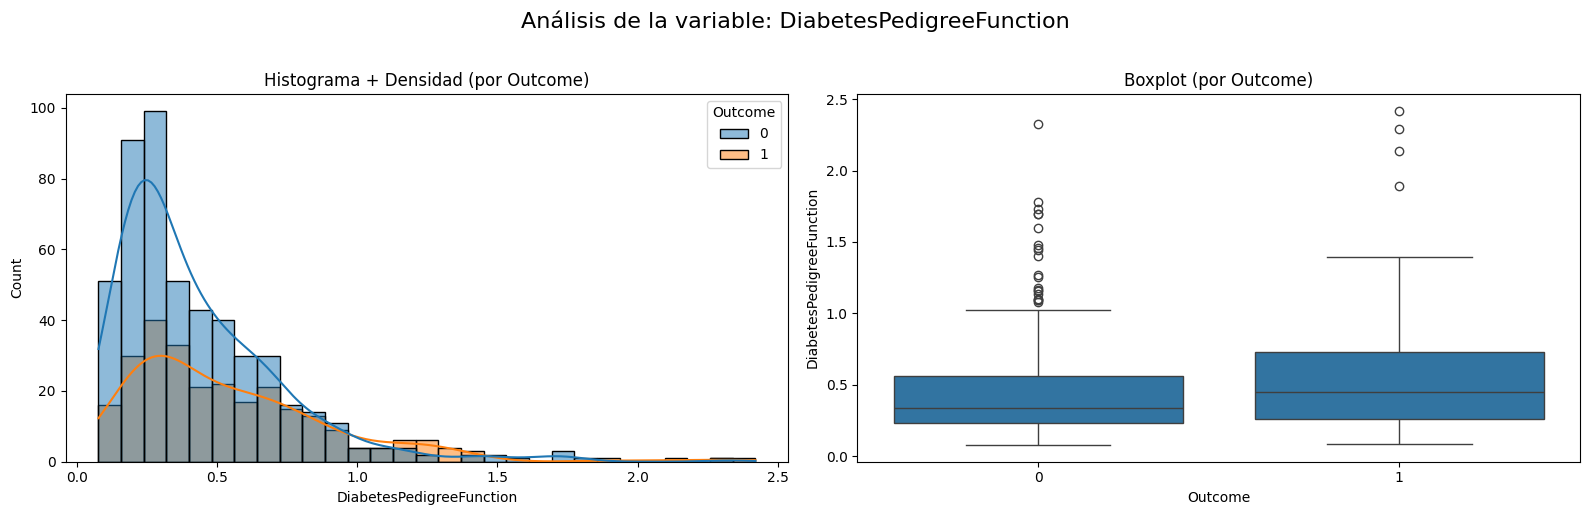


Variable DiabetesPedigreeFunction con transformación Box-Cox:


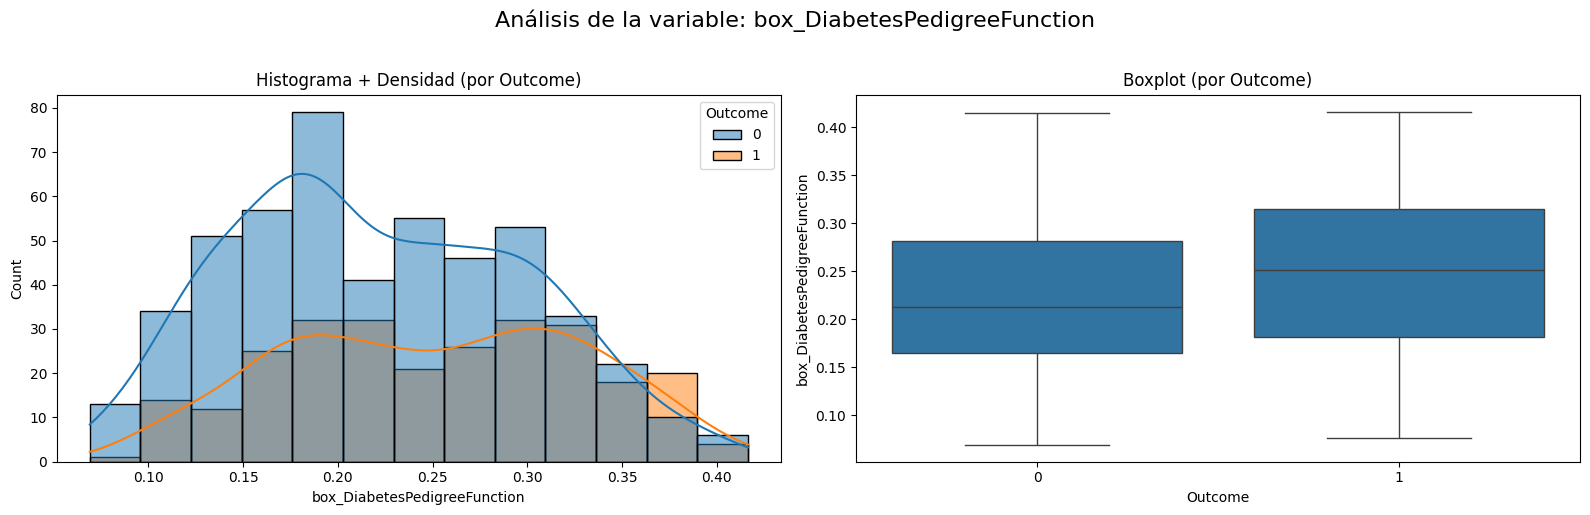

In [35]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['DiabetesPedigreeFunction'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_DiabetesPedigreeFunction'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable DiabetesPedigreeFunction sin transformación:")
analizar_variable(df_csv, "DiabetesPedigreeFunction")


print("\nVariable DiabetesPedigreeFunction con transformación Box-Cox:")
analizar_variable(df_box, "box_DiabetesPedigreeFunction")


El lambda óptimo encontrado fue: -1.1496019699210385

Variable Age sin transformación:


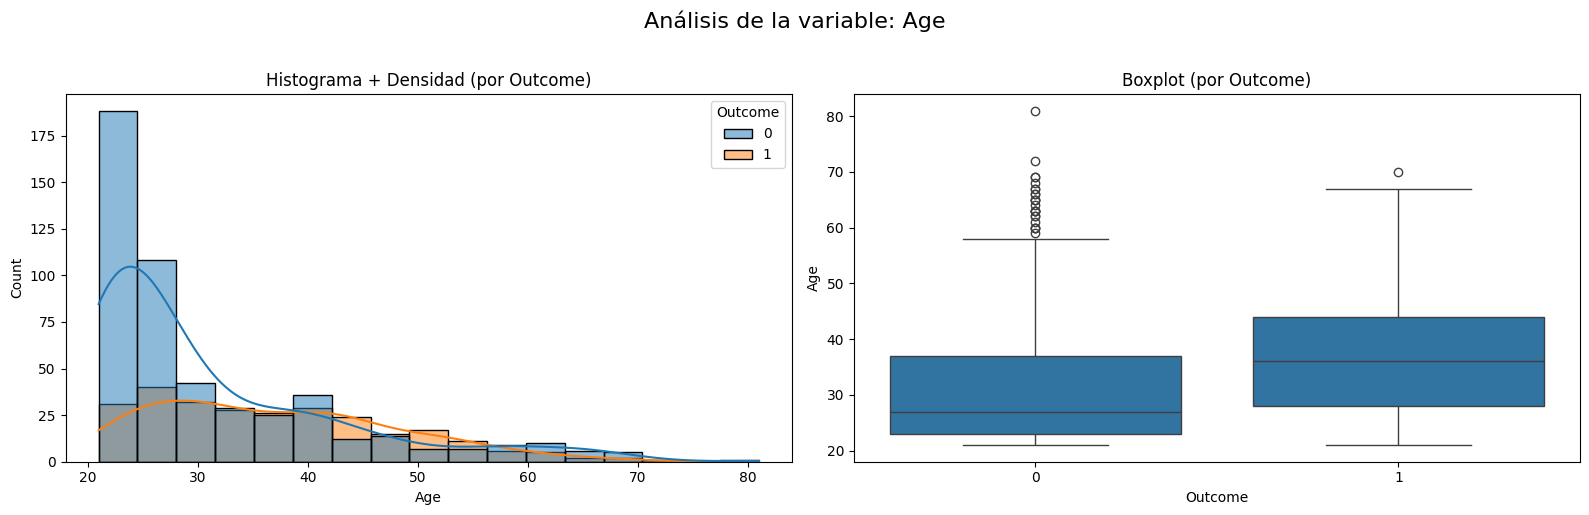


Variable Age con transformación Box-Cox:


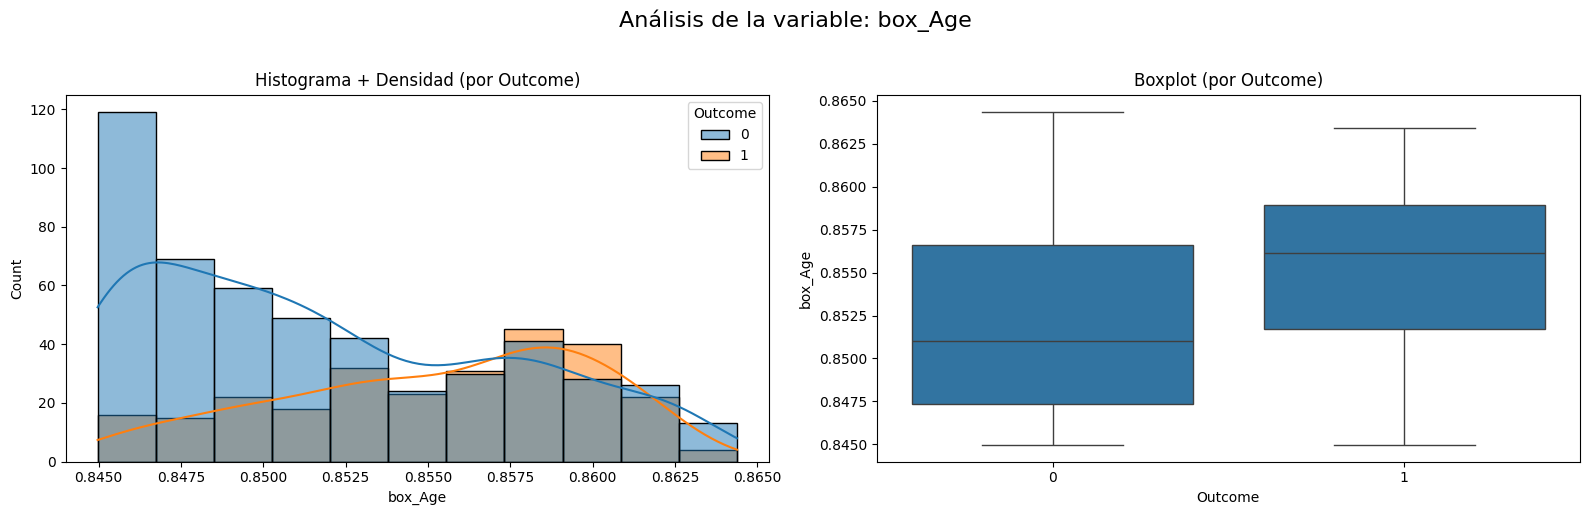

In [36]:
# 1. Preparamos los datos (¡AÑADIMOS EL +1!)
data_para_transformar = df_csv['Age'] + 1

# 2. Ejecutamos Box-Cox y capturamos AMBAS salidas
#    - 'datos_transformados' (el array de 50 filas)
#    - 'lambda_optimo' (el número único)
datos_transformados, lambda_optimo = stats.boxcox(data_para_transformar)

# 3. Asignamos SOLAMENTE el array de datos transformados a la columna
df_box['box_Age'] = datos_transformados

# (Opcional) Imprimimos el lambda para saber qué hizo
print(f"El lambda óptimo encontrado fue: {lambda_optimo}")

# --- Ahora tu código de gráficas funcionará ---
print("\nVariable Age sin transformación:")
analizar_variable(df_csv, "Age")


print("\nVariable Age con transformación Box-Cox:")
analizar_variable(df_box, "box_Age")


In [37]:
# Solución Rápida:
skew_transformado = df_box.skew(numeric_only=True)

print("--- Asimetría (Skewness) del DataFrame Transformado (solo numéricos) ---")
display(skew_transformado)

--- Asimetría (Skewness) del DataFrame Transformado (solo numéricos) ---


Pregnancies                     0.901674
Glucose                         0.173754
BloodPressure                  -1.843608
SkinThickness                   0.109372
Insulin                         2.272251
BMI                            -0.428982
DiabetesPedigreeFunction        1.919911
Age                             1.129597
Outcome                         0.635017
box_Pregnancies                -0.044644
box_Glucose                     0.122640
box_BloodPressure              -0.516806
box_SkinThickness              -0.458444
box_Insulin                     0.049581
box_BMI                         0.180839
box_DiabetesPedigreeFunction    0.142321
box_Age                         0.150219
dtype: float64

In [38]:
# Solución Rápida:
skew_transformado = df_logs.skew(numeric_only=True)

print("--- Asimetría (Skewness) del DataFrame Transformado (solo numéricos) ---")
display(skew_transformado)

--- Asimetría (Skewness) del DataFrame Transformado (solo numéricos) ---


Pregnancies                     0.901674
Glucose                         0.173754
BloodPressure                  -1.843608
SkinThickness                   0.109372
Insulin                         2.272251
BMI                            -0.428982
DiabetesPedigreeFunction        1.919911
Age                             1.129597
Outcome                         0.635017
log_Pregnancies                -0.243478
log_Glucose                    -7.260790
log_BloodPressure              -4.116526
log_SkinThickness              -0.772956
log_Insulin                     0.065978
log_BMI                        -5.855034
log_DiabetesPedigreeFunction    1.117942
log_Age                         0.614664
dtype: float64

--- 1. Análisis de Variable Cualitativa (Grupo_Edad) ---


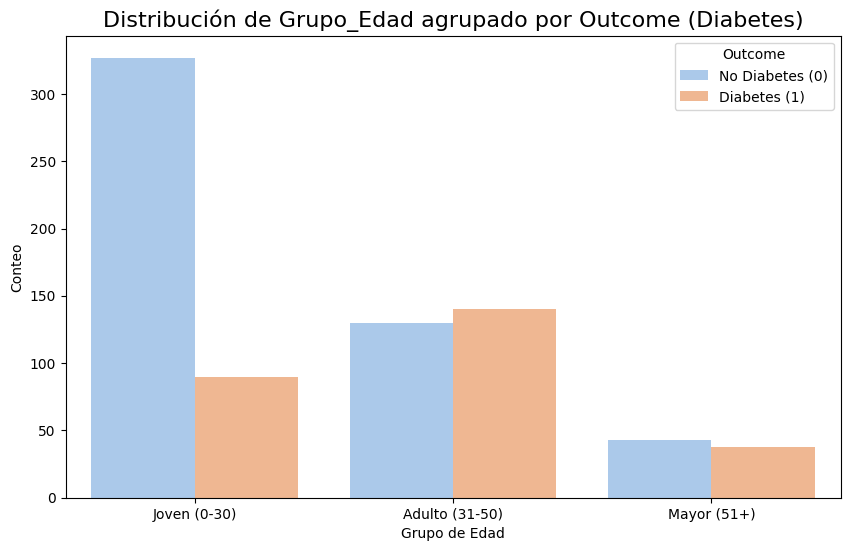


--- Tabla de Contingencia (Grupo_Edad vs Outcome) ---


Outcome         No Diabetes (0)  Diabetes (1)
Grupo_Edad                                   
Joven (0-30)                327            90
Adulto (31-50)              130           140
Mayor (51+)                  43            38


--- Tabla de Contingencia (Porcentajes por Grupo de Edad) ---


C:\Users\JERONIMO\AppData\Local\Temp\ipykernel_10032\3823300682.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(contingency_pct.applymap(lambda x: f"{x*100:.1f}%"))


Outcome        No Diabetes (0) Diabetes (1)
Grupo_Edad                                 
Joven (0-30)             78.4%        21.6%
Adulto (31-50)           48.1%        51.9%
Mayor (51+)              53.1%        46.9%



--- 2. Análisis de Balance de Clases (Variable Objetivo: Outcome) ---

Conteo de Clases (Outcome):


Outcome
0    500
1    268
Name: count, dtype: int64


Porcentaje de Clases (Outcome):


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

Análisis: El dataset está desbalanceado. La clase 0 (No Diabetes) representa el 65.1% mientras que la clase 1 (Diabetes) es el 34.9%.


C:\Users\JERONIMO\AppData\Local\Temp\ipykernel_10032\3823300682.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_csv, x='Outcome', ax=axes[1], palette=['#99d594', '#fc8d59'])
C:\Users\JERONIMO\AppData\Local\Temp\ipykernel_10032\3823300682.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([f'No Diabetes (0)\n{class_counts[0]} obs.', f'Diabetes (1)\n{class_counts[1]} obs.'])


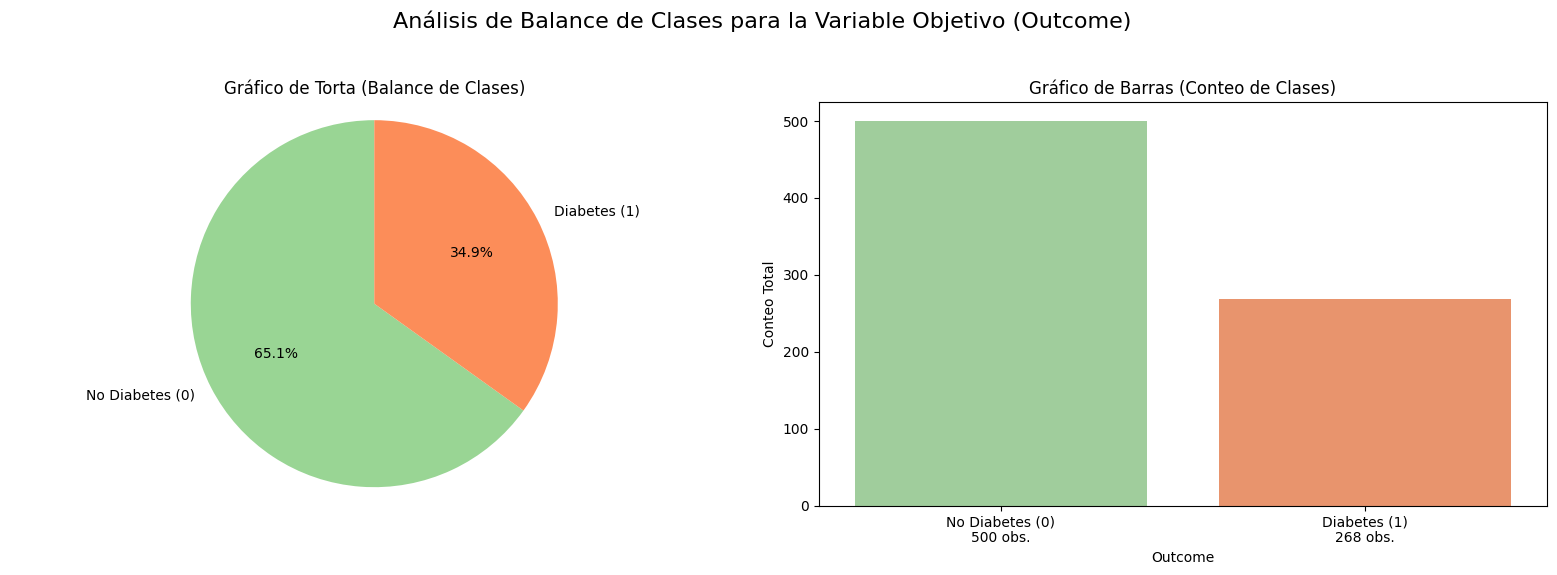

In [39]:
# --- 1. Análisis de la Variable Cualitativa (X: Grupo_Edad) ---
#    (Instrucción: Diagramas de barras agrupados por Y y tabla de contingencia)

print("--- 1. Análisis de Variable Cualitativa (Grupo_Edad) ---")

# A. Gráfico de barras agrupado por la variable objetivo (Outcome)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_csv, x='Grupo_Edad', hue='Outcome', palette='pastel')
plt.title('Distribución de Grupo_Edad agrupado por Outcome (Diabetes)', fontsize=16)
plt.xlabel('Grupo de Edad')
plt.ylabel('Conteo')
plt.legend(title='Outcome', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()

# B. Tabla de Contingencia (Distribución conjunta)
print("\n--- Tabla de Contingencia (Grupo_Edad vs Outcome) ---")
# pd.crosstab() es la función exacta para esto
contingency_table = pd.crosstab(df_csv['Grupo_Edad'], df_csv['Outcome'])

# Renombramos columnas para claridad
contingency_table = contingency_table.rename(columns={0: 'No Diabetes (0)', 1: 'Diabetes (1)'})
display(contingency_table)

# Opcional: Ver la misma tabla pero con porcentajes (distribución por fila)
print("\n--- Tabla de Contingencia (Porcentajes por Grupo de Edad) ---")
contingency_pct = pd.crosstab(df_csv['Grupo_Edad'], df_csv['Outcome'], normalize='index')
contingency_pct = contingency_pct.rename(columns={0: 'No Diabetes (0)', 1: 'Diabetes (1)'})
# Usamos .applymap para formatear los porcentajes de forma legible
display(contingency_pct.applymap(lambda x: f"{x*100:.1f}%"))


# --- 2. Análisis de la Variable Objetivo (Y: Outcome) ---
#    (Instrucción: Analizar balance, gráfico de torta y gráfico de barras)

print("\n\n--- 2. Análisis de Balance de Clases (Variable Objetivo: Outcome) ---")

# A. Analizar el balance de clases (conteo y porcentaje)
class_counts = df_csv['Outcome'].value_counts()
class_pct = df_csv['Outcome'].value_counts(normalize=True) * 100

print("\nConteo de Clases (Outcome):")
display(class_counts)
print("\nPorcentaje de Clases (Outcome):")
display(class_pct)

# Comentario de análisis:
print(f"Análisis: El dataset está desbalanceado. La clase 0 (No Diabetes) representa el {class_pct[0]:.1f}% "
      f"mientras que la clase 1 (Diabetes) es el {class_pct[1]:.1f}%.")


# B y C. Gráfico de Torta y Gráfico de Barras (para la variable objetivo)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis de Balance de Clases para la Variable Objetivo (Outcome)', fontsize=16)

# Gráfico de Torta (Pie Chart)
axes[0].pie(class_counts, labels=[f'No Diabetes (0)', f'Diabetes (1)'], 
            autopct='%1.1f%%', startangle=90, colors=['#99d594', '#fc8d59'])
axes[0].set_title('Gráfico de Torta (Balance de Clases)')
axes[0].axis('equal') # Asegura que el gráfico sea circular

# Gráfico de Barras
sns.countplot(data=df_csv, x='Outcome', ax=axes[1], palette=['#99d594', '#fc8d59'])
axes[1].set_title('Gráfico de Barras (Conteo de Clases)')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Conteo Total')
# Seteamos las etiquetas del eje X para que sean claras
axes[1].set_xticklabels([f'No Diabetes (0)\n{class_counts[0]} obs.', f'Diabetes (1)\n{class_counts[1]} obs.'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el layout para el supertítulo
plt.show()

In [40]:
def analisis_comparativo(df, y, variables_cuant, variables_cualit):
    resultados = []

    grupos = df[y].unique()
    n_grupos = len(grupos)

    # ============================
    #   VARIABLES CUANTITATIVAS
    # ============================
    for var in variables_cuant:
        # --- Prueba de normalidad por grupo ---
        normalidades = {}
        p_norm_dict = {}

        for g in grupos:
            datos = df[df[y] == g][var].dropna()
            stat, p_norm = shapiro(datos)
            normalidades[g] = p_norm > 0.05
            p_norm_dict[g] = float(f"{p_norm:.4f}")   # <-- Guardar p-value de normalidad

        cumple_normalidad = all(normalidades.values())

        # ========================================
        #     Si TODOS los grupos son normales
        # ========================================
        if cumple_normalidad:
            datos_grupos = [df[df[y] == g][var].dropna() for g in grupos]

            # Homocedasticidad
            stat_lev, p_lev = levene(*datos_grupos)
            homocedasticidad = p_lev > 0.05

            if n_grupos == 2:
                prueba = "t-test independiente"
                stat, p_valor = ttest_ind(*datos_grupos, equal_var=homocedasticidad)
            else:
                prueba = "ANOVA"
                stat, p_valor = f_oneway(*datos_grupos)

        # ========================================
        #     NO normal → No paramétricas
        # ========================================
        else:
            if n_grupos == 2:
                prueba = "Mann-Whitney U"
                g1, g2 = grupos
                datos1 = df[df[y] == g1][var].dropna()
                datos2 = df[df[y] == g2][var].dropna()
                stat, p_valor = mannwhitneyu(datos1, datos2, alternative="two-sided")
            else:
                prueba = "Kruskal-Wallis"
                datos_grupos = [df[df[y] == g][var].dropna() for g in grupos]
                stat, p_valor = kruskal(*datos_grupos)

        # Empaquetar resultados
        resultados.append({
            "Variable": var,
            "Tipo": "Cuantitativa",
            "Normalidad por grupo (p-values)": p_norm_dict,
            "Todos normales": cumple_normalidad,
            "Prueba aplicada": prueba,
            "p-valor prueba": float(f"{p_valor:.4f}"),
            "Diferencias Significativa (p<0.05)": p_valor < 0.05
        })

    # ============================
    #   VARIABLES CUALITATIVAS
    # ============================
    for var in variables_cualit:
        tabla = pd.crosstab(df[var], df[y])
        stat, p_valor, _, _ = chi2_contingency(tabla)

        resultados.append({
            "Variable": var,
            "Tipo": "Cualitativa",
            "Prueba aplicada": "Chi-cuadrado de independencia",
            "p-valor prueba": float(f"{p_valor:.4f}"),
            "Diferencias Significativa (p<0.05)": p_valor < 0.05
        })

    return pd.DataFrame(resultados)


In [41]:
variables_cuant = ["box_Pregnancies", "box_Glucose", "box_BloodPressure", "box_SkinThickness", "box_Insulin", "box_BMI", "box_DiabetesPedigreeFunction"]
variables_cualit = ["Grupo_Edad"]

resultados = analisis_comparativo(df_box, y="Outcome", 
                                  variables_cuant=variables_cuant,
                                  variables_cualit=variables_cualit)

resultados

Variable          Tipo Normalidad por grupo (p-values)  \
0               box_Pregnancies  Cuantitativa                {1: 0.0, 0: 0.0}   
1                   box_Glucose  Cuantitativa                {1: 0.0, 0: 0.0}   
2             box_BloodPressure  Cuantitativa                {1: 0.0, 0: 0.0}   
3             box_SkinThickness  Cuantitativa                {1: 0.0, 0: 0.0}   
4                   box_Insulin  Cuantitativa                {1: 0.0, 0: 0.0}   
5                       box_BMI  Cuantitativa                {1: 0.0, 0: 0.0}   
6  box_DiabetesPedigreeFunction  Cuantitativa             {1: 0.0001, 0: 0.0}   
7                    Grupo_Edad   Cualitativa                             NaN   

  Todos normales                Prueba aplicada  p-valor prueba  \
0          False                 Mann-Whitney U          0.0000   
1          False                 Mann-Whitney U          0.0000   
2          False                 Mann-Whitney U          0.0001   
3          False                 Mann-Whitney U          0.0130   
4          False                 Mann-Whitney U          0.0657   
5          False                 Mann-Whitney U          0.0000   
6          False                 Mann-Whitney U          0.0000   
7            NaN  Chi-cuadrado de independencia          0.0000   

   Diferencias Significativa (p<0.05)  
0                                True  
1                                True  
2                                True  
3                                True  
4                               False  
5                                True  
6                                True  
7                                True

In [42]:
def analizar_multicolinealidad(df, variables_significativas, umbral=0.8):
    """
    df: DataFrame original
    variables_significativas: lista de variables cuantitativas ya filtradas en el punto 4
    umbral: correlación absoluta para eliminar variables (default = 0.8)
    """

    # 1. Subset solo con variables significativas
    df_sub = df[variables_significativas]

    # 2. Matriz de correlación
    corr_matrix = df_sub.corr()

    # 3. Plot de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de Correlación (Variables Significativas)")
    plt.show()

    # 4. Buscar pares de alta correlación
    altas_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= umbral:
                altas_corr.append((
                    corr_matrix.index[i],
                    corr_matrix.columns[j],
                    round(corr_val, 4)
                ))

    # 5. Decidir variables a eliminar (tomar la segunda del par)
    variables_eliminar = list({par[0] for par in altas_corr})

    # 6. Variables finales sin multicolinealidad
    variables_finales = [v for v in variables_significativas if v not in variables_eliminar]

    # 7. Resultados
    resultados = {
        "Matriz de correlación": corr_matrix,
        "Pares con alta correlación (>|{}|)".format(umbral): altas_corr,
        "Variables eliminadas": variables_eliminar if len(variables_eliminar) > 0 else "Ninguna",
        "Variables finales": variables_finales
    }

    return resultados

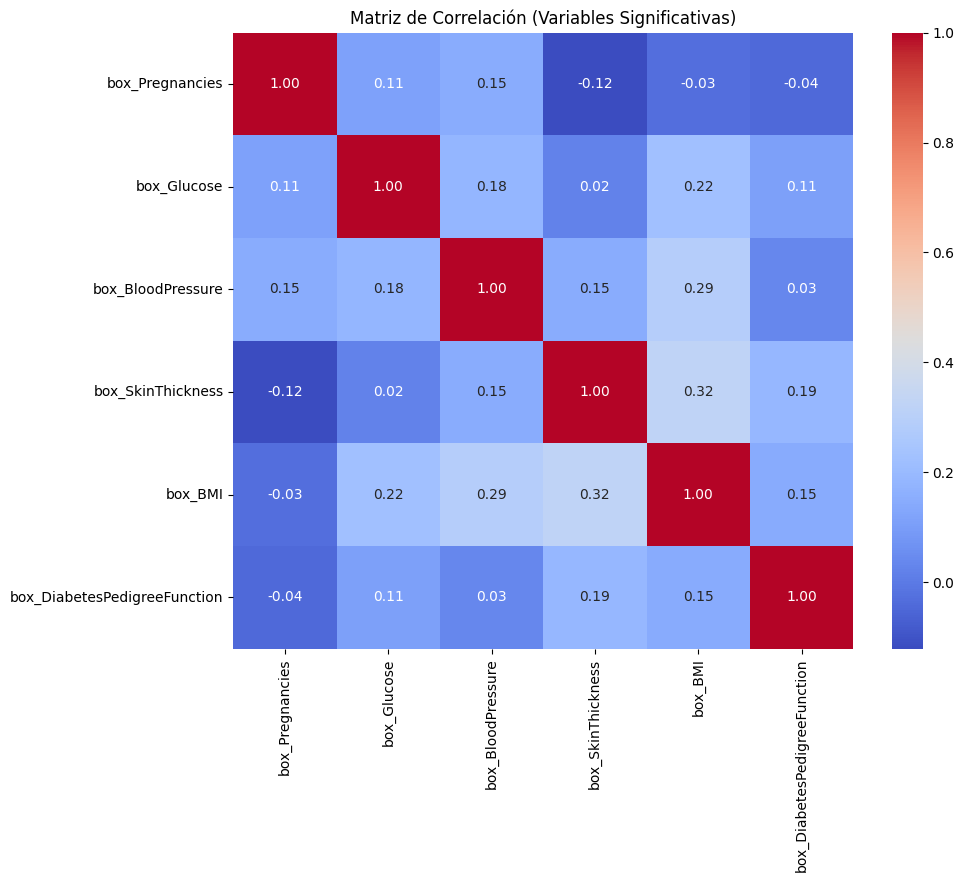


--- Matriz de correlación ---
                              box_Pregnancies  box_Glucose  box_BloodPressure  \
box_Pregnancies                      1.000000     0.113381           0.149301   
box_Glucose                          0.113381     1.000000           0.182515   
box_BloodPressure                    0.149301     0.182515           1.000000   
box_SkinThickness                   -0.121442     0.019166           0.149508   
box_BMI                             -0.031566     0.221893           0.289899   
box_DiabetesPedigreeFunction        -0.044595     0.110543           0.034399   

                              box_SkinThickness   box_BMI  \
box_Pregnancies                       -0.121442 -0.031566   
box_Glucose                            0.019166  0.221893   
box_BloodPressure                      0.149508  0.289899   
box_SkinThickness                      1.000000  0.323449   
box_BMI                                0.323449  1.000000   
box_DiabetesPedigreeFunction       

In [43]:
variables_significativas = ["box_Pregnancies", "box_Glucose", "box_BloodPressure", "box_SkinThickness", "box_BMI", "box_DiabetesPedigreeFunction"]
res = analizar_multicolinealidad(df_box, variables_significativas)

for k, v in res.items():
    print("\n---", k, "---")
    print(v)

In [44]:
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo, escenario):
    y_pred = modelo.predict(X_test)
    
    # 1. Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 2. Mostrar reporte breve
    print(f"--- {nombre_modelo} ({escenario}) ---")
    print(f"Accuracy: {accuracy:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    
    # 3. Retornar resultados para guardarlos
    return {
        'Modelo': nombre_modelo,
        'Escenario': escenario,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Matriz': confusion_matrix(y_test, y_pred)
    }

In [45]:
print("="*50)
print("PUNTO 8: DIVISIÓN DE DATOS Y ESCALADO")
print("="*50)

# 1. Definir X e Y
# Usamos la lista 'variables_significativas' que vi en tu notebook
# Asegúrate de que 'df_box' tenga estas columnas
X = df_box[variables_significativas] 
y = df_csv['Outcome'] # La variable objetivo original

# 2. División 70% Train - 30% Test
# stratify=y es CRÍTICO para mantener la proporción de diabetes/no diabetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Estandarización (Escalado)
# Regresión Logística y KNN son muy sensibles a la escala.
scaler = StandardScaler()

# Ajustamos (fit) solo con train y transformamos ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Datos divididos correctamente.")
print(f"Train shape: {X_train_scaled.shape} | Test shape: {X_test_scaled.shape}")
print(f"Proporción de Diabetes en Train: {y_train.mean():.2%}")
print(f"Proporción de Diabetes en Test:  {y_test.mean():.2%}")

PUNTO 8: DIVISIÓN DE DATOS Y ESCALADO
Datos divididos correctamente.
Train shape: (537, 6) | Test shape: (231, 6)
Proporción de Diabetes en Train: 34.82%
Proporción de Diabetes en Test:  35.06%


PUNTO 8: EVALUACIÓN DETALLADA (REGRESIÓN LOGÍSTICA)

--- Métricas del Modelo ---
• Exactitud (Accuracy):   0.7446
• Precisión (Precision):  0.6719
• Sensibilidad (Recall):  0.5309
• F1-Score:               0.5931
• Área ROC (AUC):         0.8352


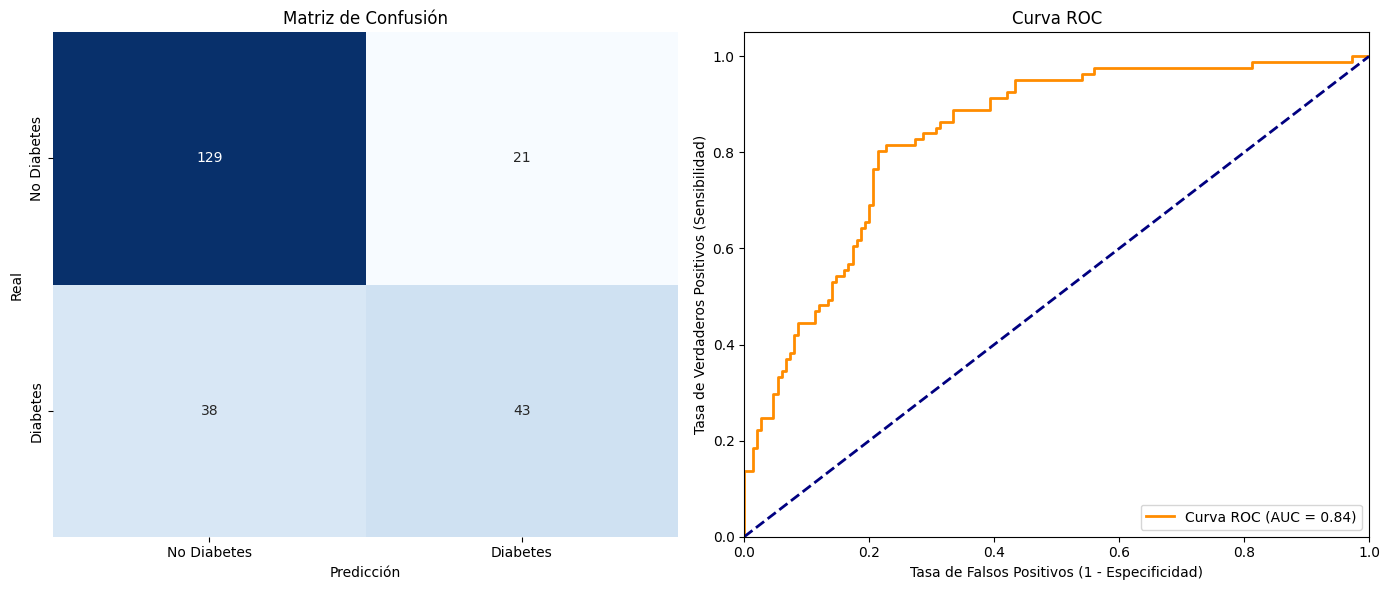

In [51]:
"""from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns"""

print("="*50)
print("PUNTO 8: EVALUACIÓN DETALLADA (REGRESIÓN LOGÍSTICA)")
print("="*50)

# 1. Instanciar y Entrenar el Modelo
modelo_log = LogisticRegression(random_state=42)
modelo_log.fit(X_train_scaled, y_train)

# 2. Realizar Predicciones
# A. Predicción de CLASES (0 o 1) -> Para Matriz, Accuracy, F1, etc.
y_pred = modelo_log.predict(X_test_scaled)

# B. Predicción de PROBABILIDADES -> Necesario EXCLUSIVAMENTE para AUC-ROC
# Nos quedamos con la columna 1 (probabilidad de tener Diabetes)
y_prob = modelo_log.predict_proba(X_test_scaled)[:, 1]

# 3. Calcular Métricas
matriz_conf = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred) # Sensibilidad
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob) # Área bajo la curva

# 4. Mostrar Resultados Numéricos
print(f"\n--- Métricas del Modelo ---")
print(f"• Exactitud (Accuracy):   {accuracy:.4f}")
print(f"• Precisión (Precision):  {precision:.4f}")
print(f"• Sensibilidad (Recall):  {recall:.4f}")
print(f"• F1-Score:               {f1:.4f}")
print(f"• Área ROC (AUC):         {auc_score:.4f}")

# 5. Visualización (Matriz de Confusión y Curva ROC)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# A. Matriz de Confusión
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('Matriz de Confusión')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[0].set_yticklabels(['No Diabetes', 'Diabetes'])

# B. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea de azar
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
axes[1].set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
axes[1].set_title('Curva ROC')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

=== TABLA COMPARATIVA DE MÉTRICAS ===


Escenario  Accuracy  Precision  Recall (Sensibilidad)  F1-Score  \
0  Sin Balancear    0.7446     0.6719                 0.5309    0.5931   
1      Con SMOTE    0.7706     0.6591                 0.7160    0.6864   

   AUC-ROC  
0   0.8352  
1   0.8356

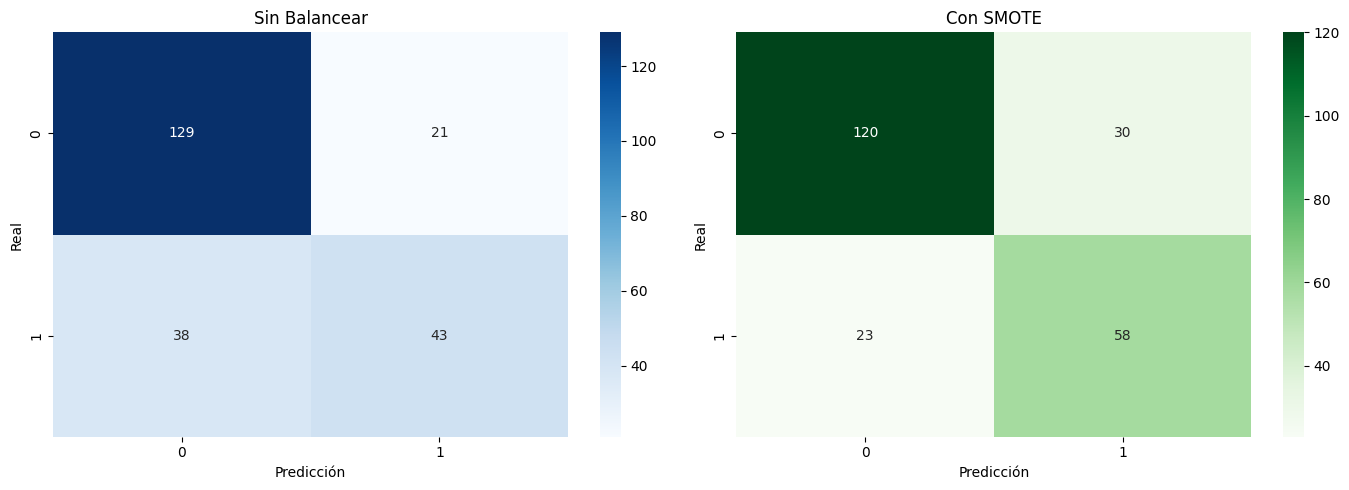

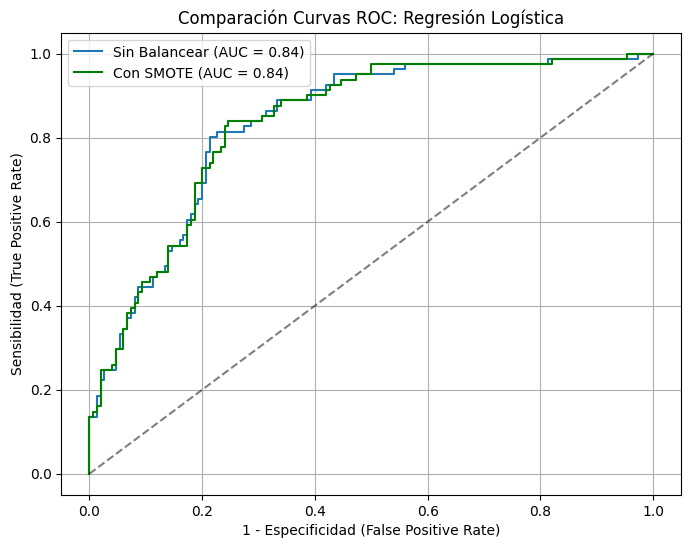

In [50]:
"""from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns"""

# --- 1. PREPARACIÓN DE DATOS ---

# Definimos X (Variables transformadas Box-Cox) e Y (Variable objetivo original)
X = df_box[variables_significativas]
y = df_csv['Outcome']

# División: 70% Entrenamiento, 30% Prueba (Estratificada)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Estandarización (Crucial para Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- 2. ESCENARIO 1: SIN BALANCEAR ---

# Entrenar
modelo_orig = LogisticRegression(random_state=42)
modelo_orig.fit(X_train_scaled, y_train)

# Predecir
y_pred_orig = modelo_orig.predict(X_test_scaled)
y_prob_orig = modelo_orig.predict_proba(X_test_scaled)[:, 1] # Probabilidad para AUC

# Calcular Métricas
metricas_orig = {
    'Escenario': 'Sin Balancear',
    'Accuracy': accuracy_score(y_test, y_pred_orig),
    'Precision': precision_score(y_test, y_pred_orig),
    'Recall (Sensibilidad)': recall_score(y_test, y_pred_orig),
    'F1-Score': f1_score(y_test, y_pred_orig),
    'AUC-ROC': roc_auc_score(y_test, y_prob_orig)
}


# --- 3. ESCENARIO 2: CON SMOTE (BALANCEADO) ---

# Aplicar SMOTE (Solo al set de entrenamiento)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Entrenar (con datos balanceados)
modelo_smote = LogisticRegression(random_state=42)
modelo_smote.fit(X_train_smote, y_train_smote)

# Predecir (siempre sobre el test original)
y_pred_smote = modelo_smote.predict(X_test_scaled)
y_prob_smote = modelo_smote.predict_proba(X_test_scaled)[:, 1] # Probabilidad para AUC

# Calcular Métricas
metricas_smote = {
    'Escenario': 'Con SMOTE',
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision': precision_score(y_test, y_pred_smote),
    'Recall (Sensibilidad)': recall_score(y_test, y_pred_smote),
    'F1-Score': f1_score(y_test, y_pred_smote),
    'AUC-ROC': roc_auc_score(y_test, y_prob_smote)
}


# --- 4. VISUALIZACIÓN Y COMPARACIÓN ---

# A. Tabla Comparativa
df_comparacion = pd.DataFrame([metricas_orig, metricas_smote])
print("=== TABLA COMPARATIVA DE MÉTRICAS ===")
display(df_comparacion.round(4))

# B. Matrices de Confusión (Lado a Lado)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz Original
sns.heatmap(confusion_matrix(y_test, y_pred_orig), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Sin Balancear')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Con SMOTE')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# C. Curvas ROC Comparativas
plt.figure(figsize=(8, 6))

# Curva Original
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
plt.plot(fpr_orig, tpr_orig, label=f"Sin Balancear (AUC = {metricas_orig['AUC-ROC']:.2f})")

# Curva SMOTE
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
plt.plot(fpr_smote, tpr_smote, label=f"Con SMOTE (AUC = {metricas_smote['AUC-ROC']:.2f})", color='green')

# Línea base
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('Comparación Curvas ROC: Regresión Logística')
plt.xlabel('1 - Especificidad (False Positive Rate)')
plt.ylabel('Sensibilidad (True Positive Rate)')
plt.legend()
plt.grid(True)
plt.show()